In [6]:
from glob import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import pywt
smi=0

In [7]:
all_file_path=glob('dataverse_files/*.edf')
print(len(all_file_path))

28


In [8]:
healthy_file_path=[i for i in all_file_path if 'h' in i.split('\\')[1]]
patient_file_path=[i for i in all_file_path if 's' in i.split('\\')[1]]
print(len(healthy_file_path),len(patient_file_path))

14 14


In [9]:
def read_data(file_path):
  data=mne.io.read_raw_edf(file_path,preload=True)
  #data.set_eeg_refrence()
  data.filter(l_freq=0.5,h_freq=60)
  #epochs=mne.make_fixed_length_epochs(data,duration=5,overlap=1)
  epochs=data
  data=epochs.get_data()
  return data

In [10]:
%%capture
control_epochs_array = [read_data(i) for i in healthy_file_path]
patient_epochs_array = [read_data(i) for i in patient_file_path]

In [11]:
control_epochs_array[0].shape , patient_epochs_array[0].shape #number of epochs , number of channels , length of signal

((19, 231250), (19, 211250))

In [12]:
import numpy as np

def extract_features(time_series, window_size, stride):
    """
    Extracts 16-dimensional statistical features from a dynamical time series data by applying 
    a sliding window of size window_size with stride of size stride and computing statistics 
    over each window.
    
    Args:
        time_series (numpy.ndarray): The time series data, shape (n_samples, n_features).
        window_size (int): The size of the sliding window.
        stride (int): The size of the stride.
        
    Returns:
        features (numpy.ndarray): The extracted features, shape (n_windows, 16).
    """
    time_series=time_series.reshape(-1,1)
    n_samples = time_series.shape[0]
    n_windows = int(np.ceil((n_samples - window_size + 1) / stride))
    n_features=1
    features = np.zeros((n_windows, 6))
    
    for i in range(n_windows):
        start = i * stride
        end = start + window_size
        window = time_series[start:end]
        window_mean = np.mean(window, axis=0)
        window_std = np.std(window, axis=0)
        window_min = np.min(window, axis=0)
        window_max = np.max(window, axis=0)
        window_median = np.median(window, axis=0)
        window_q1 = np.percentile(window, 25, axis=0)
        window_q3 = np.percentile(window, 75, axis=0)
        window_iqr = window_q3 - window_q1
        features[i] = np.concatenate([window_mean, window_std, window_min, window_max, window_median, window_iqr])
    
    return features

In [13]:
def Smi(x,y) :
    x = x.reshape(x.shape[0] , -1)
    x=(x-np.min(x))/(np.max(x)-np.min(x))
    
    y = y.reshape(y.shape[0] , -1)
    y=(y-np.min(y))/(np.max(y)-np.min(y))

    sum=0
    m=x.shape[0]
    smi_list=[]
    for i in range(m):
        dist_x=x[i]-x
        dist_x=np.linalg.norm(dist_x , axis=1)
        dist_x[i]=10000
        i_star=np.argmin(dist_x)
    
        dist_y = y[i]-y
        dist_y=np.linalg.norm(dist_y , axis=1)
        
        d_i_max = np.max(dist_y)
        
        
        y_i_star=y[i_star]
        
        d_i_star=np.linalg.norm(y[i]-y_i_star)
        
        dist_y[i]=10000
        d_i_min=np.min(dist_y)
    
        smi=(d_i_max - d_i_star)/(d_i_max - d_i_min+0.00000000001)
        smi_list.append(smi)
        sum=sum+smi
    
    mean=sum/m
    
    return mean

In [14]:
## Control
c1 = control_epochs_array[0]
c2 = control_epochs_array[1]
c3 = control_epochs_array[2]
c4 = control_epochs_array[3]
c5 = control_epochs_array[4]
c6 = control_epochs_array[5]
c7 = control_epochs_array[6]
c8 = control_epochs_array[7]
c9 = control_epochs_array[8]
c10 = control_epochs_array[9]
c11 = control_epochs_array[10]
c12 = control_epochs_array[11]
c13 = control_epochs_array[12]
c14 = control_epochs_array[13]


## Patient
p1 = patient_epochs_array[0]
p2 = patient_epochs_array[1]
p3 = patient_epochs_array[2]
p4 = patient_epochs_array[3]
p5 = patient_epochs_array[4]
p6 = patient_epochs_array[5]
p7 = patient_epochs_array[6]
p8 = patient_epochs_array[7]
p9 = patient_epochs_array[8]
p10 = patient_epochs_array[9]
p11 = patient_epochs_array[10]
p12 = patient_epochs_array[11]
p13 = patient_epochs_array[12]
p14 = patient_epochs_array[13]


Text(0.5, 1.0, 'Patient 1 - Channel 1')

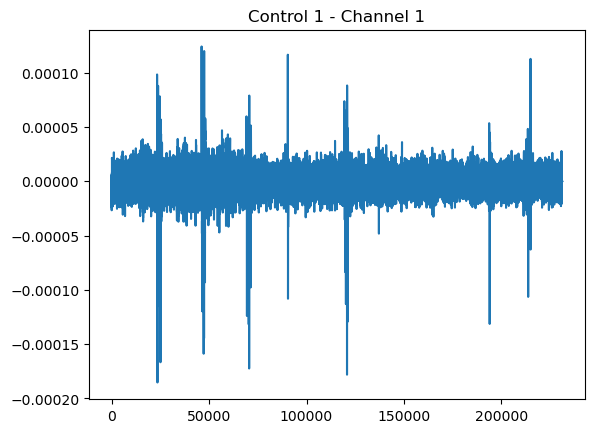

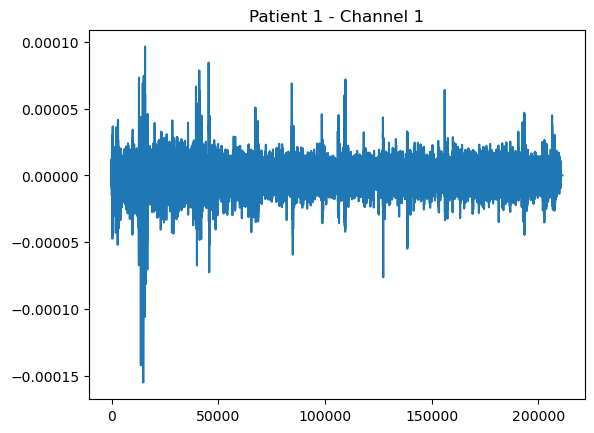

In [15]:
plt.figure()
plt.plot(c1[0])
plt.title("Control 1 - Channel 1")

plt.figure()
plt.plot(p1[0])
plt.title("Patient 1 - Channel 1")

# Control Group :

In [125]:
## Compute Smi in Control 1
m = c1.shape[0]
M_c1 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c1[i]
            y1=c1[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c1[i,j]=smi
        
for i in range(m):
    M_c1[i,i]=1

np.save("M_c1" , M_c1 )

Smi between << x : channel 0  , y : channel 1 >> is :0.8730813657384824
Smi between << x : channel 0  , y : channel 2 >> is :0.7761196795049926
Smi between << x : channel 0  , y : channel 3 >> is :0.7667074617214877
Smi between << x : channel 0  , y : channel 4 >> is :0.7242911147001451
Smi between << x : channel 0  , y : channel 5 >> is :0.9694329409814648
Smi between << x : channel 0  , y : channel 6 >> is :0.883108568145887
Smi between << x : channel 0  , y : channel 7 >> is :0.8123266851125771
Smi between << x : channel 0  , y : channel 8 >> is :0.7700348252366079
Smi between << x : channel 0  , y : channel 9 >> is :0.7202181125563395
Smi between << x : channel 0  , y : channel 10 >> is :0.9541066496600463
Smi between << x : channel 0  , y : channel 11 >> is :0.772448001909207
Smi between << x : channel 0  , y : channel 12 >> is :0.7906175196079798
Smi between << x : channel 0  , y : channel 13 >> is :0.91071392609056
Smi between << x : channel 0  , y : channel 14 >> is :0.80050086

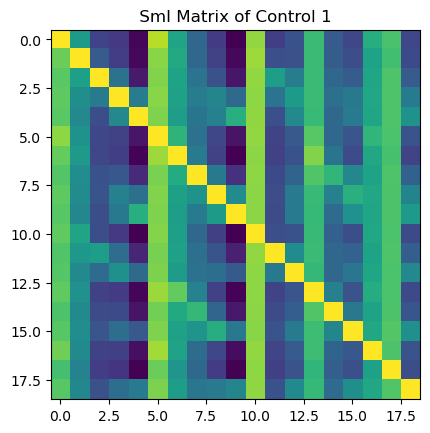

In [157]:
plt.figure()
plt.imshow(M_c1, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 1 ")
plt.show()

In [159]:
## Compute Smi in Control 2
m = c2.shape[0]
M_c2 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c2[i]
            y1=c2[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c2[i,j]=smi
        
for i in range(m):
    M_c2[i,i]=1

np.save("M_c2" , M_c2 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9578387728303124
Smi between << x : channel 0  , y : channel 2 >> is :0.9453822298932436
Smi between << x : channel 0  , y : channel 3 >> is :0.7517829849225459
Smi between << x : channel 0  , y : channel 4 >> is :0.77568158808834
Smi between << x : channel 0  , y : channel 5 >> is :0.9708842268341745
Smi between << x : channel 0  , y : channel 6 >> is :0.9680296573689176
Smi between << x : channel 0  , y : channel 7 >> is :0.9333497331998254
Smi between << x : channel 0  , y : channel 8 >> is :0.8684807559963017
Smi between << x : channel 0  , y : channel 9 >> is :0.7715647457503161
Smi between << x : channel 0  , y : channel 10 >> is :0.9163803780136398
Smi between << x : channel 0  , y : channel 11 >> is :0.925037607307623
Smi between << x : channel 0  , y : channel 12 >> is :0.8284316125193467
Smi between << x : channel 0  , y : channel 13 >> is :0.8715370103362875
Smi between << x : channel 0  , y : channel 14 >> is :0.9602302

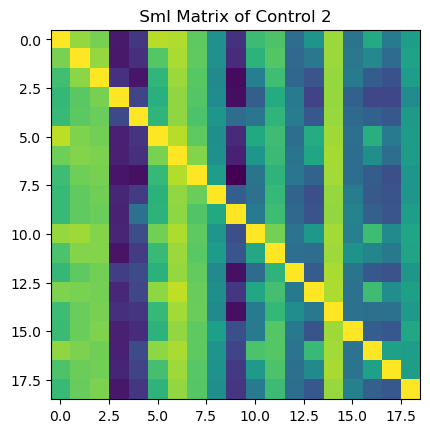

In [160]:
plt.figure()
plt.imshow(M_c2, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 2 ")
plt.show()

In [169]:
## Compute Smi in Control 3
m = c3.shape[0]
M_c3 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c3[i]
            y1=c3[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c3[i,j]=smi
        
for i in range(m):
    M_c3[i,i]=1

np.save("M_c3" , M_c3 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9497757576718868
Smi between << x : channel 0  , y : channel 2 >> is :0.9711033772416855
Smi between << x : channel 0  , y : channel 3 >> is :0.9570881200624151
Smi between << x : channel 0  , y : channel 4 >> is :0.9355614319466715
Smi between << x : channel 0  , y : channel 5 >> is :0.9814043240714447
Smi between << x : channel 0  , y : channel 6 >> is :0.9657377439099135
Smi between << x : channel 0  , y : channel 7 >> is :0.9784571078096169
Smi between << x : channel 0  , y : channel 8 >> is :0.9489371452342243
Smi between << x : channel 0  , y : channel 9 >> is :0.9202230418688632
Smi between << x : channel 0  , y : channel 10 >> is :0.9663034870323417
Smi between << x : channel 0  , y : channel 11 >> is :0.9610887444842054
Smi between << x : channel 0  , y : channel 12 >> is :0.9697661036673986
Smi between << x : channel 0  , y : channel 13 >> is :0.9693563676500915
Smi between << x : channel 0  , y : channel 14 >> is :0.9614

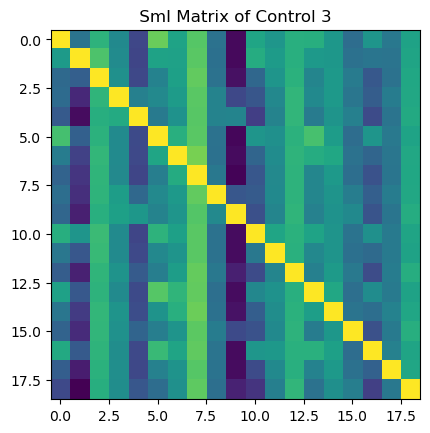

In [170]:
plt.figure()
plt.imshow(M_c3, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 3 ")
plt.show()

In [171]:
## Compute Smi in Control 4
m = c4.shape[0]
M_c4 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c4[i]
            y1=c4[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c4[i,j]=smi
        
for i in range(m):
    M_c4[i,i]=1

np.save("M_c4" , M_c4 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9804487237997651
Smi between << x : channel 0  , y : channel 2 >> is :0.9816300708527074
Smi between << x : channel 0  , y : channel 3 >> is :0.9786107047645081
Smi between << x : channel 0  , y : channel 4 >> is :0.9841443545446447
Smi between << x : channel 0  , y : channel 5 >> is :0.9829551514917481
Smi between << x : channel 0  , y : channel 6 >> is :0.9628098280025049
Smi between << x : channel 0  , y : channel 7 >> is :0.9822109387460153
Smi between << x : channel 0  , y : channel 8 >> is :0.9791529118964333
Smi between << x : channel 0  , y : channel 9 >> is :0.9838144736179216
Smi between << x : channel 0  , y : channel 10 >> is :0.9847872005747988
Smi between << x : channel 0  , y : channel 11 >> is :0.9888307215602196
Smi between << x : channel 0  , y : channel 12 >> is :0.9845972081668115
Smi between << x : channel 0  , y : channel 13 >> is :0.9831196449784969
Smi between << x : channel 0  , y : channel 14 >> is :0.9884

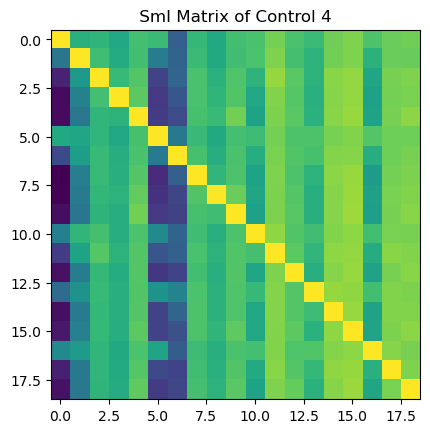

In [172]:
plt.figure()
plt.imshow(M_c4, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 4 ")
plt.show()

In [173]:
## Compute Smi in Control 5
m = c5.shape[0]
M_c5 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c5[i]
            y1=c5[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c5[i,j]=smi
        
for i in range(m):
    M_c5[i,i]=1

np.save("M_c5" , M_c5 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9678337727640849
Smi between << x : channel 0  , y : channel 2 >> is :0.9240612307706396
Smi between << x : channel 0  , y : channel 3 >> is :0.7756279455026563
Smi between << x : channel 0  , y : channel 4 >> is :0.7927776684419197
Smi between << x : channel 0  , y : channel 5 >> is :0.9860232344345086
Smi between << x : channel 0  , y : channel 6 >> is :0.9310715779280695
Smi between << x : channel 0  , y : channel 7 >> is :0.9457289165485459
Smi between << x : channel 0  , y : channel 8 >> is :0.769821069188613
Smi between << x : channel 0  , y : channel 9 >> is :0.7766247524767642
Smi between << x : channel 0  , y : channel 10 >> is :0.9507907161579402
Smi between << x : channel 0  , y : channel 11 >> is :0.9656109658463563
Smi between << x : channel 0  , y : channel 12 >> is :0.9077075487858937
Smi between << x : channel 0  , y : channel 13 >> is :0.9552840061557494
Smi between << x : channel 0  , y : channel 14 >> is :0.89749

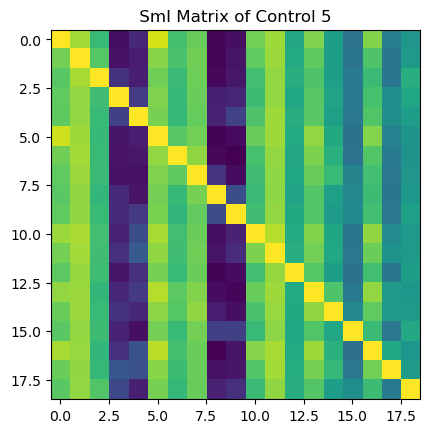

In [174]:
plt.figure()
plt.imshow(M_c5, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 5 ")
plt.show()

In [19]:
## Compute Smi in Control 6
m = c6.shape[0]
M_c6 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c6[i]
            y1=c6[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c6[i,j]=smi
        
for i in range(m):
    M_c6[i,i]=1

np.save("M_c6" , M_c6 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9983010082383628
Smi between << x : channel 0  , y : channel 2 >> is :0.9982146995988534
Smi between << x : channel 0  , y : channel 3 >> is :0.9970087785259187
Smi between << x : channel 0  , y : channel 4 >> is :0.9948110546164214
Smi between << x : channel 0  , y : channel 5 >> is :0.9983620570971361
Smi between << x : channel 0  , y : channel 6 >> is :0.9977273130136587
Smi between << x : channel 0  , y : channel 7 >> is :0.9988204417106122
Smi between << x : channel 0  , y : channel 8 >> is :0.9977958212356797
Smi between << x : channel 0  , y : channel 9 >> is :0.9660847263473239
Smi between << x : channel 0  , y : channel 10 >> is :0.9948672374241085
Smi between << x : channel 0  , y : channel 11 >> is :0.994705722306179
Smi between << x : channel 0  , y : channel 12 >> is :0.9986339795392741
Smi between << x : channel 0  , y : channel 13 >> is :0.9981370703170759
Smi between << x : channel 0  , y : channel 14 >> is :0.99772

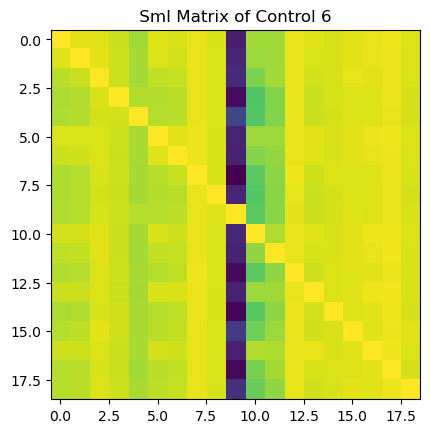

In [20]:
plt.figure()
plt.imshow(M_c6, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 6 ")
plt.show()

In [21]:
## Compute Smi in Control 7
m = c7.shape[0]
M_c7 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c7[i]
            y1=c7[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c7[i,j]=smi
        
for i in range(m):
    M_c7[i,i]=1

np.save("M_c7" , M_c7 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9730073056728287
Smi between << x : channel 0  , y : channel 2 >> is :0.960697585456804
Smi between << x : channel 0  , y : channel 3 >> is :0.9359635513938792
Smi between << x : channel 0  , y : channel 4 >> is :0.9032842645023328
Smi between << x : channel 0  , y : channel 5 >> is :0.9797902827353772
Smi between << x : channel 0  , y : channel 6 >> is :0.9645529770538873
Smi between << x : channel 0  , y : channel 7 >> is :0.9274465820819048
Smi between << x : channel 0  , y : channel 8 >> is :0.909165994670848
Smi between << x : channel 0  , y : channel 9 >> is :0.9105071870498346
Smi between << x : channel 0  , y : channel 10 >> is :0.959198477385054
Smi between << x : channel 0  , y : channel 11 >> is :0.9505499482372084
Smi between << x : channel 0  , y : channel 12 >> is :0.9399746551897837
Smi between << x : channel 0  , y : channel 13 >> is :0.9628111507230754
Smi between << x : channel 0  , y : channel 14 >> is :0.9515372

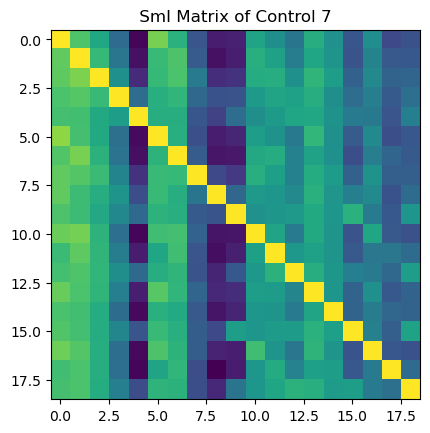

In [22]:
plt.figure()
plt.imshow(M_c7, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 7 ")
plt.show()

In [23]:
## Compute Smi in Control 8
m = c8.shape[0]
M_c8 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c8[i]
            y1=c8[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c8[i,j]=smi
        
for i in range(m):
    M_c8[i,i]=1

np.save("M_c8" , M_c8 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9720008947751844
Smi between << x : channel 0  , y : channel 2 >> is :0.9526186095222182
Smi between << x : channel 0  , y : channel 3 >> is :0.9131493622704967
Smi between << x : channel 0  , y : channel 4 >> is :0.9000289127333005
Smi between << x : channel 0  , y : channel 5 >> is :0.9738703083236302
Smi between << x : channel 0  , y : channel 6 >> is :0.9571339778555163
Smi between << x : channel 0  , y : channel 7 >> is :0.9156844144176791
Smi between << x : channel 0  , y : channel 8 >> is :0.898520978384813
Smi between << x : channel 0  , y : channel 9 >> is :0.8838759202800619
Smi between << x : channel 0  , y : channel 10 >> is :0.964684704102012
Smi between << x : channel 0  , y : channel 11 >> is :0.9355940191198057
Smi between << x : channel 0  , y : channel 12 >> is :0.9666773552140617
Smi between << x : channel 0  , y : channel 13 >> is :0.9575715746071828
Smi between << x : channel 0  , y : channel 14 >> is :0.894745

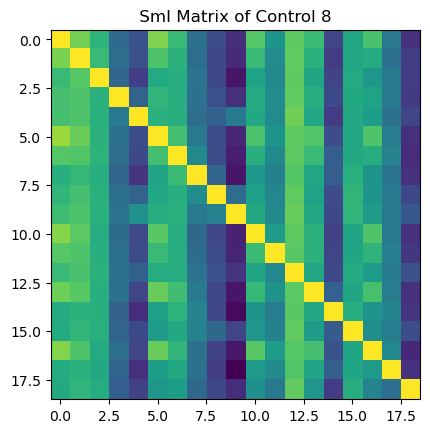

In [24]:
plt.figure()
plt.imshow(M_c8, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 8 ")
plt.show()

In [25]:
## Compute Smi in Control9
m = c9.shape[0]
M_c9 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c9[i]
            y1=c9[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c9[i,j]=smi
        
for i in range(m):
    M_c9[i,i]=1

np.save("M_c9" , M_c9 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9338747587658188
Smi between << x : channel 0  , y : channel 2 >> is :0.9580916753313756
Smi between << x : channel 0  , y : channel 3 >> is :0.9121699541106252
Smi between << x : channel 0  , y : channel 4 >> is :0.7401958718240023
Smi between << x : channel 0  , y : channel 5 >> is :0.9625178724562641
Smi between << x : channel 0  , y : channel 6 >> is :0.8795985771928815
Smi between << x : channel 0  , y : channel 7 >> is :0.936917839457184
Smi between << x : channel 0  , y : channel 8 >> is :0.9345335933860087
Smi between << x : channel 0  , y : channel 9 >> is :0.7329732758669231
Smi between << x : channel 0  , y : channel 10 >> is :0.9651941803153798
Smi between << x : channel 0  , y : channel 11 >> is :0.9320409139215302
Smi between << x : channel 0  , y : channel 12 >> is :0.8797211952422983
Smi between << x : channel 0  , y : channel 13 >> is :0.9275258339554245
Smi between << x : channel 0  , y : channel 14 >> is :0.89280

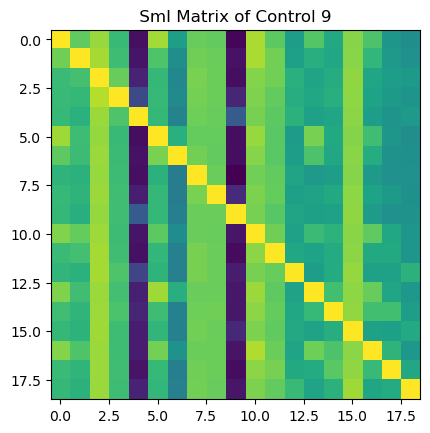

In [26]:
plt.figure()
plt.imshow(M_c9, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 9 ")
plt.show()

In [27]:
## Compute Smi in Control 10
m = c10.shape[0]
M_c10 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c10[i]
            y1=c10[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c10[i,j]=smi
        
for i in range(m):
    M_c10[i,i]=1

np.save("M_c10" , M_c10 )

Smi between << x : channel 0  , y : channel 1 >> is :0.947610604103321
Smi between << x : channel 0  , y : channel 2 >> is :0.8559143292090314
Smi between << x : channel 0  , y : channel 3 >> is :0.8812091809008985
Smi between << x : channel 0  , y : channel 4 >> is :0.7398072896592192
Smi between << x : channel 0  , y : channel 5 >> is :0.9912215111831804
Smi between << x : channel 0  , y : channel 6 >> is :0.9257566983965037
Smi between << x : channel 0  , y : channel 7 >> is :0.9908023079548366
Smi between << x : channel 0  , y : channel 8 >> is :0.7870507506780773
Smi between << x : channel 0  , y : channel 9 >> is :0.9910788384513021
Smi between << x : channel 0  , y : channel 10 >> is :0.9041547473645739
Smi between << x : channel 0  , y : channel 11 >> is :0.9061538680833849
Smi between << x : channel 0  , y : channel 12 >> is :0.9263466428002015
Smi between << x : channel 0  , y : channel 13 >> is :0.9262848238261603
Smi between << x : channel 0  , y : channel 14 >> is :0.99610

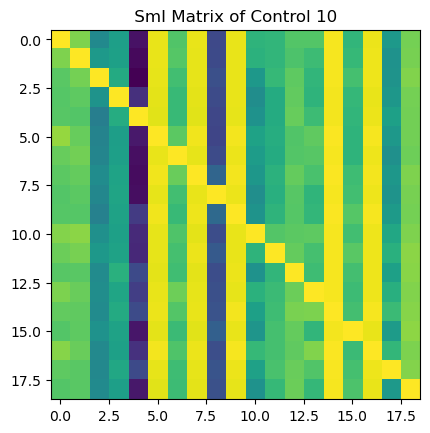

In [28]:
plt.figure()
plt.imshow(M_c10, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 10 ")
plt.show()

In [29]:
## Compute Smi in Control 11
m = c11.shape[0]
M_c11 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c11[i]
            y1=c11[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c11[i,j]=smi
        
for i in range(m):
    M_c11[i,i]=1

np.save("M_c11" , M_c11 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9893095829641442
Smi between << x : channel 0  , y : channel 2 >> is :0.9795365669691324
Smi between << x : channel 0  , y : channel 3 >> is :0.9794300402057186
Smi between << x : channel 0  , y : channel 4 >> is :0.9746352500013331
Smi between << x : channel 0  , y : channel 5 >> is :0.9885817459621902
Smi between << x : channel 0  , y : channel 6 >> is :0.9608519295745531
Smi between << x : channel 0  , y : channel 7 >> is :0.98476851139413
Smi between << x : channel 0  , y : channel 8 >> is :0.9764210771309201
Smi between << x : channel 0  , y : channel 9 >> is :0.9716648600691943
Smi between << x : channel 0  , y : channel 10 >> is :0.979974867249672
Smi between << x : channel 0  , y : channel 11 >> is :0.9827954241481043
Smi between << x : channel 0  , y : channel 12 >> is :0.9840072607328366
Smi between << x : channel 0  , y : channel 13 >> is :0.9811036941506976
Smi between << x : channel 0  , y : channel 14 >> is :0.9888633

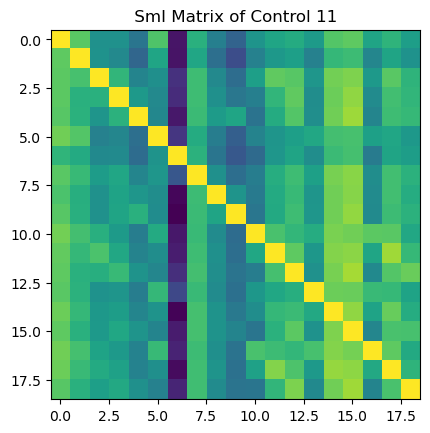

In [30]:
plt.figure()
plt.imshow(M_c11, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 11 ")
plt.show()

In [31]:
## Compute Smi in Control 12
m = c12.shape[0]
M_c12 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c12[i]
            y1=c12[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c12[i,j]=smi
        
for i in range(m):
    M_c12[i,i]=1

np.save("M_c12" , M_c12 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9690717443480432
Smi between << x : channel 0  , y : channel 2 >> is :0.961334357967855
Smi between << x : channel 0  , y : channel 3 >> is :0.9453395405146626
Smi between << x : channel 0  , y : channel 4 >> is :0.9241253420446138
Smi between << x : channel 0  , y : channel 5 >> is :0.9365434101559703
Smi between << x : channel 0  , y : channel 6 >> is :0.9478832996356252
Smi between << x : channel 0  , y : channel 7 >> is :0.9196351180322927
Smi between << x : channel 0  , y : channel 8 >> is :0.9363287917515606
Smi between << x : channel 0  , y : channel 9 >> is :0.91871266626918
Smi between << x : channel 0  , y : channel 10 >> is :0.9621639476437824
Smi between << x : channel 0  , y : channel 11 >> is :0.9344406768958069
Smi between << x : channel 0  , y : channel 12 >> is :0.949849194167227
Smi between << x : channel 0  , y : channel 13 >> is :0.917888432389651
Smi between << x : channel 0  , y : channel 14 >> is :0.933385919

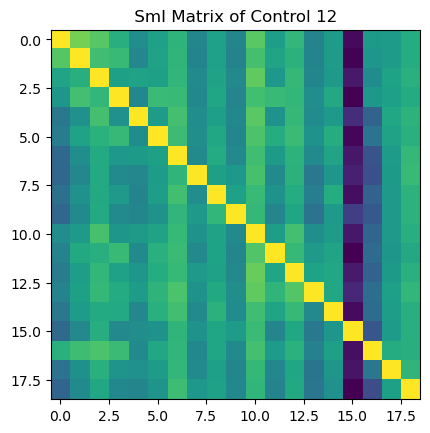

In [32]:
plt.figure()
plt.imshow(M_c12, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 12 ")
plt.show()

In [33]:
## Compute Smi in Control 13
m = c13.shape[0]
M_c13 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c13[i]
            y1=c13[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c13[i,j]=smi
        
for i in range(m):
    M_c13[i,i]=1

np.save("M_c13" , M_c13 )

Smi between << x : channel 0  , y : channel 1 >> is :0.8920948950761909
Smi between << x : channel 0  , y : channel 2 >> is :0.9212475701055794
Smi between << x : channel 0  , y : channel 3 >> is :0.8342672852414456
Smi between << x : channel 0  , y : channel 4 >> is :0.849803190582738
Smi between << x : channel 0  , y : channel 5 >> is :0.9674724401046099
Smi between << x : channel 0  , y : channel 6 >> is :0.8395815121236673
Smi between << x : channel 0  , y : channel 7 >> is :0.7824952478261973
Smi between << x : channel 0  , y : channel 8 >> is :0.7770261835903327
Smi between << x : channel 0  , y : channel 9 >> is :0.8947452718433301
Smi between << x : channel 0  , y : channel 10 >> is :0.9396562722546742
Smi between << x : channel 0  , y : channel 11 >> is :0.8218796901223958
Smi between << x : channel 0  , y : channel 12 >> is :0.9610063712593551
Smi between << x : channel 0  , y : channel 13 >> is :0.9359751674667669
Smi between << x : channel 0  , y : channel 14 >> is :0.84090

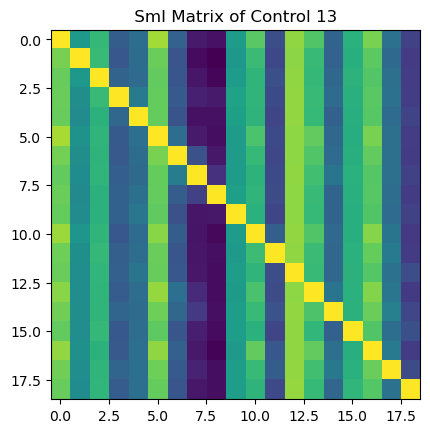

In [34]:
plt.figure()
plt.imshow(M_c13, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 13 ")
plt.show()

In [35]:
## Compute Smi in Control 14
m = c14.shape[0]
M_c14 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=c14[i]
            y1=c14[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_c14[i,j]=smi
        
for i in range(m):
    M_c14[i,i]=1

np.save("M_c14" , M_c14 )

Smi between << x : channel 0  , y : channel 1 >> is :0.9967124085268991
Smi between << x : channel 0  , y : channel 2 >> is :0.9964547354397884
Smi between << x : channel 0  , y : channel 3 >> is :0.9967955154407084
Smi between << x : channel 0  , y : channel 4 >> is :0.9951405034431807
Smi between << x : channel 0  , y : channel 5 >> is :0.9971016081788711
Smi between << x : channel 0  , y : channel 6 >> is :0.9980438343926551
Smi between << x : channel 0  , y : channel 7 >> is :0.9975162813404191
Smi between << x : channel 0  , y : channel 8 >> is :0.9975693631908197
Smi between << x : channel 0  , y : channel 9 >> is :0.9955128037948412
Smi between << x : channel 0  , y : channel 10 >> is :0.9977935900892909
Smi between << x : channel 0  , y : channel 11 >> is :0.9973925095890179
Smi between << x : channel 0  , y : channel 12 >> is :0.9975099634190377
Smi between << x : channel 0  , y : channel 13 >> is :0.9977212549013122
Smi between << x : channel 0  , y : channel 14 >> is :0.9983

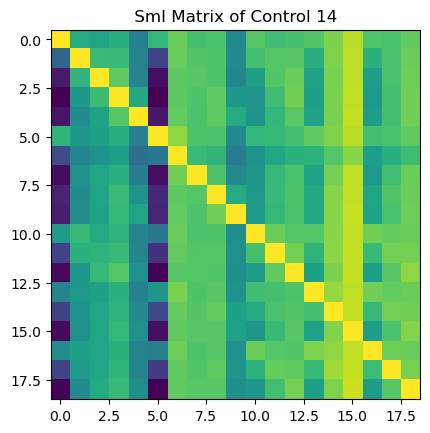

In [36]:
plt.figure()
plt.imshow(M_c14, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Control 14 ")
plt.show()

# Patient Group :

In [150]:
## Compute Smi in Patient 1
m = p1.shape[0]
M_p1 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p1[i]
            y1=p1[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p1[i,j]=smi
        
for i in range(m):
    M_p1[i,i]=1        
np.save("M_p1",M_p1)

Smi between << x : channel 0  , y : channel 1 >> is :0.9420054568798674
Smi between << x : channel 0  , y : channel 2 >> is :0.8461802513168596
Smi between << x : channel 0  , y : channel 3 >> is :0.8292213891311953
Smi between << x : channel 0  , y : channel 4 >> is :0.9162291051089881
Smi between << x : channel 0  , y : channel 5 >> is :0.9794767237615811
Smi between << x : channel 0  , y : channel 6 >> is :0.9591080649884378
Smi between << x : channel 0  , y : channel 7 >> is :0.9950062744026826
Smi between << x : channel 0  , y : channel 8 >> is :0.7817558527202443
Smi between << x : channel 0  , y : channel 9 >> is :0.8262605924228215
Smi between << x : channel 0  , y : channel 10 >> is :0.939241902317179
Smi between << x : channel 0  , y : channel 11 >> is :0.9318205555900082
Smi between << x : channel 0  , y : channel 12 >> is :0.8008915618365832
Smi between << x : channel 0  , y : channel 13 >> is :0.9584665177646569
Smi between << x : channel 0  , y : channel 14 >> is :0.88222

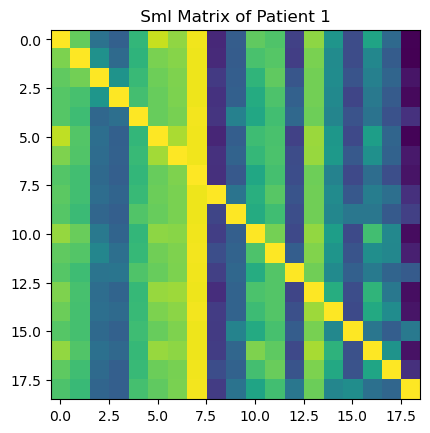

In [156]:
plt.figure()
plt.imshow(M_p1, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 1 ")
plt.show()

In [161]:
## Compute Smi in Patient 2
m = p2.shape[0]
M_p2 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p2[i]
            y1=p2[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p2[i,j]=smi
        
for i in range(m):
    M_p2[i,i]=1        
np.save("M_p2",M_p2)

Smi between << x : channel 0  , y : channel 1 >> is :0.9591021529607262
Smi between << x : channel 0  , y : channel 2 >> is :0.9509961511899576
Smi between << x : channel 0  , y : channel 3 >> is :0.9402116101713156
Smi between << x : channel 0  , y : channel 4 >> is :0.9525770982848313
Smi between << x : channel 0  , y : channel 5 >> is :0.9921999070205859
Smi between << x : channel 0  , y : channel 6 >> is :0.9460382090425802
Smi between << x : channel 0  , y : channel 7 >> is :0.9702094511113629
Smi between << x : channel 0  , y : channel 8 >> is :0.9054976708153075
Smi between << x : channel 0  , y : channel 9 >> is :0.8533575953987246
Smi between << x : channel 0  , y : channel 10 >> is :0.9903105982159112
Smi between << x : channel 0  , y : channel 11 >> is :0.9609178143590431
Smi between << x : channel 0  , y : channel 12 >> is :0.969752969094349
Smi between << x : channel 0  , y : channel 13 >> is :0.9194288688949089
Smi between << x : channel 0  , y : channel 14 >> is :0.95276

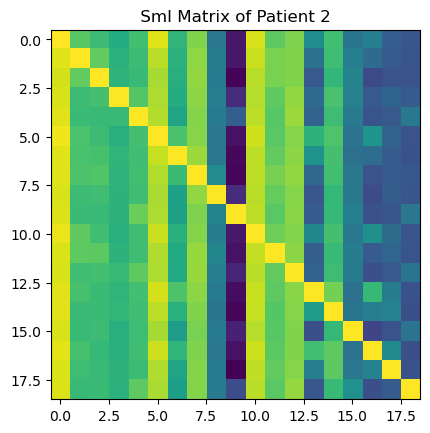

In [162]:
plt.figure()
plt.imshow(M_p2, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 2 ")
plt.show()

In [163]:
## Compute Smi in Patient 3
m = p3.shape[0]
M_p3 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p3[i]
            y1=p3[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p3[i,j]=smi
        
for i in range(m):
    M_p3[i,i]=1        
np.save("M_p3",M_p3)

Smi between << x : channel 0  , y : channel 1 >> is :0.9106204083052427
Smi between << x : channel 0  , y : channel 2 >> is :0.8990632177855673
Smi between << x : channel 0  , y : channel 3 >> is :0.776957118015016
Smi between << x : channel 0  , y : channel 4 >> is :0.7840347244732878
Smi between << x : channel 0  , y : channel 5 >> is :0.9778109548196997
Smi between << x : channel 0  , y : channel 6 >> is :0.9153352623490139
Smi between << x : channel 0  , y : channel 7 >> is :0.8229066044024074
Smi between << x : channel 0  , y : channel 8 >> is :0.8278575619494534
Smi between << x : channel 0  , y : channel 9 >> is :0.7926806092546643
Smi between << x : channel 0  , y : channel 10 >> is :0.9440861673166887
Smi between << x : channel 0  , y : channel 11 >> is :0.9211285376889142
Smi between << x : channel 0  , y : channel 12 >> is :0.8131776021717467
Smi between << x : channel 0  , y : channel 13 >> is :0.9148518804920988
Smi between << x : channel 0  , y : channel 14 >> is :0.83855

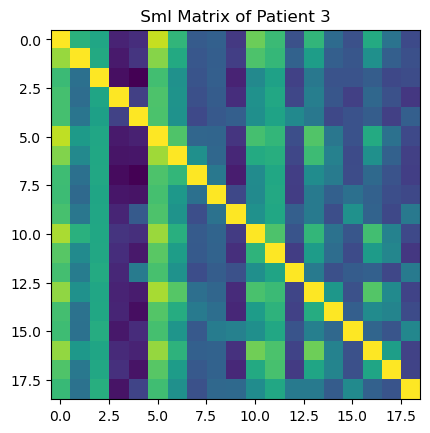

In [164]:
plt.figure()
plt.imshow(M_p3, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 3 ")
plt.show()

In [165]:
## Compute Smi in Patient 4
m = p4.shape[0]
M_p4 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p4[i]
            y1=p4[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p4[i,j]=smi
        
for i in range(m):
    M_p4[i,i]=1        
np.save("M_p4",M_p4)

Smi between << x : channel 0  , y : channel 1 >> is :0.9228536866646078
Smi between << x : channel 0  , y : channel 2 >> is :0.9362495132423294
Smi between << x : channel 0  , y : channel 3 >> is :0.901031213164793
Smi between << x : channel 0  , y : channel 4 >> is :0.8924305883328378
Smi between << x : channel 0  , y : channel 5 >> is :0.96653367840861
Smi between << x : channel 0  , y : channel 6 >> is :0.9640618836513408
Smi between << x : channel 0  , y : channel 7 >> is :0.9502589804034409
Smi between << x : channel 0  , y : channel 8 >> is :0.9709417059762839
Smi between << x : channel 0  , y : channel 9 >> is :0.9076316537888118
Smi between << x : channel 0  , y : channel 10 >> is :0.9416662739281286
Smi between << x : channel 0  , y : channel 11 >> is :0.9561342980422858
Smi between << x : channel 0  , y : channel 12 >> is :0.9825678082886169
Smi between << x : channel 0  , y : channel 13 >> is :0.9636913584740984
Smi between << x : channel 0  , y : channel 14 >> is :0.9089616

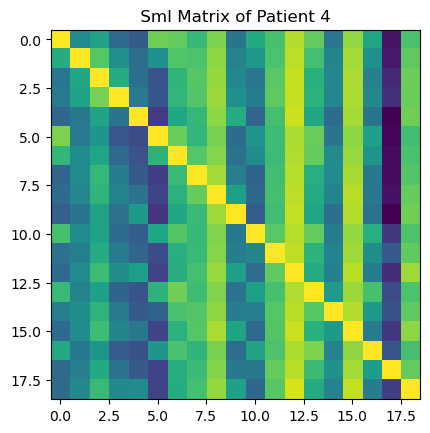

In [166]:
plt.figure()
plt.imshow(M_p4, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 4 ")
plt.show()

In [167]:
## Compute Smi in Patient 5
m = p5.shape[0]
M_p5 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p5[i]
            y1=p5[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p5[i,j]=smi
        
for i in range(m):
    M_p5[i,i]=1        
np.save("M_p5",M_p5)

Smi between << x : channel 0  , y : channel 1 >> is :0.9208998617988319
Smi between << x : channel 0  , y : channel 2 >> is :0.8149620926487784
Smi between << x : channel 0  , y : channel 3 >> is :0.8136143944873593
Smi between << x : channel 0  , y : channel 4 >> is :0.7812444175641453
Smi between << x : channel 0  , y : channel 5 >> is :0.9746875206867114
Smi between << x : channel 0  , y : channel 6 >> is :0.8142069100673651
Smi between << x : channel 0  , y : channel 7 >> is :0.949159479501533
Smi between << x : channel 0  , y : channel 8 >> is :0.7999710504941158
Smi between << x : channel 0  , y : channel 9 >> is :0.7940200740375785
Smi between << x : channel 0  , y : channel 10 >> is :0.9900118108128602
Smi between << x : channel 0  , y : channel 11 >> is :0.8089927560055152
Smi between << x : channel 0  , y : channel 12 >> is :0.81820107317737
Smi between << x : channel 0  , y : channel 13 >> is :0.9044228113834059
Smi between << x : channel 0  , y : channel 14 >> is :0.8420509

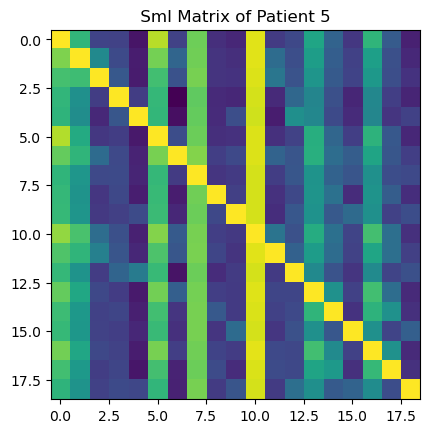

In [168]:
plt.figure()
plt.imshow(M_p5, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 5 ")
plt.show()

In [176]:
## Compute Smi in Patient 6
m = p6.shape[0]
M_p6 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p6[i]
            y1=p6[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p6[i,j]=smi
        
for i in range(m):
    M_p6[i,i]=1        
np.save("M_p6",M_p6)

Smi between << x : channel 0  , y : channel 1 >> is :0.9811501946382216
Smi between << x : channel 0  , y : channel 2 >> is :0.9911811451605039
Smi between << x : channel 0  , y : channel 3 >> is :0.9872290279432213
Smi between << x : channel 0  , y : channel 4 >> is :0.9855890169195037
Smi between << x : channel 0  , y : channel 5 >> is :0.988436794834461
Smi between << x : channel 0  , y : channel 6 >> is :0.9830882960558593
Smi between << x : channel 0  , y : channel 7 >> is :0.9901436959660914
Smi between << x : channel 0  , y : channel 8 >> is :0.9892014376211774
Smi between << x : channel 0  , y : channel 9 >> is :0.984655113554593
Smi between << x : channel 0  , y : channel 10 >> is :0.9937960424580148
Smi between << x : channel 0  , y : channel 11 >> is :0.9937270285035872
Smi between << x : channel 0  , y : channel 12 >> is :0.9921177446480429
Smi between << x : channel 0  , y : channel 13 >> is :0.9911824516552982
Smi between << x : channel 0  , y : channel 14 >> is :0.992260

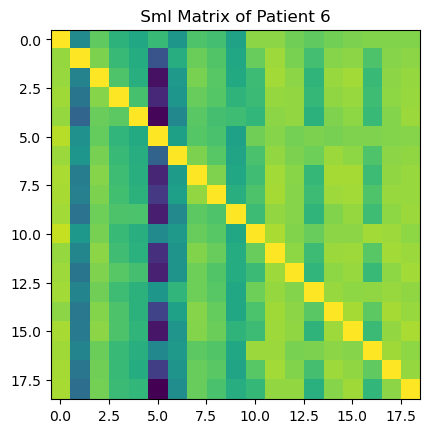

In [177]:
plt.figure()
plt.imshow(M_p6, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 6 ")
plt.show()

In [178]:
## Compute Smi in Patient 7
m = p7.shape[0]
M_p7 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p7[i]
            y1=p7[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p7[i,j]=smi
        
for i in range(m):
    M_p7[i,i]=1        
np.save("M_p7",M_p7)

Smi between << x : channel 0  , y : channel 1 >> is :0.9980645536300234
Smi between << x : channel 0  , y : channel 2 >> is :0.9988877210362135
Smi between << x : channel 0  , y : channel 3 >> is :0.997909921092742
Smi between << x : channel 0  , y : channel 4 >> is :0.9979110373528416
Smi between << x : channel 0  , y : channel 5 >> is :0.9860758457817028
Smi between << x : channel 0  , y : channel 6 >> is :0.9806329038559728
Smi between << x : channel 0  , y : channel 7 >> is :0.978259422869943
Smi between << x : channel 0  , y : channel 8 >> is :0.9981758595298188
Smi between << x : channel 0  , y : channel 9 >> is :0.9976674167567814
Smi between << x : channel 0  , y : channel 10 >> is :0.9969473195701063
Smi between << x : channel 0  , y : channel 11 >> is :0.9775291545511747
Smi between << x : channel 0  , y : channel 12 >> is :0.9992972562366882
Smi between << x : channel 0  , y : channel 13 >> is :0.9974919589104797
Smi between << x : channel 0  , y : channel 14 >> is :0.990435

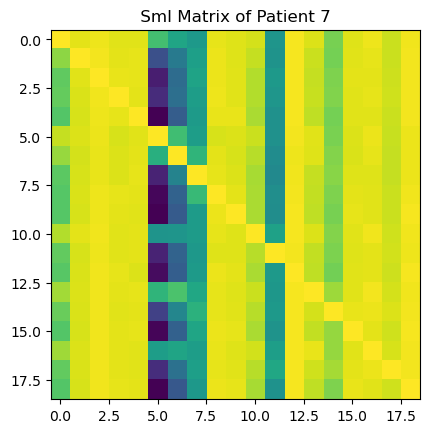

In [179]:
plt.figure()
plt.imshow(M_p7, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 7 ")
plt.show()

In [180]:
## Compute Smi in Patient 8
m = p8.shape[0]
M_p8 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p8[i]
            y1=p8[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p8[i,j]=smi
        
for i in range(m):
    M_p8[i,i]=1        
np.save("M_p8",M_p8)

Smi between << x : channel 0  , y : channel 1 >> is :0.9570397246113327
Smi between << x : channel 0  , y : channel 2 >> is :0.9322812762180455
Smi between << x : channel 0  , y : channel 3 >> is :0.8610070207957329
Smi between << x : channel 0  , y : channel 4 >> is :0.8722771771973429
Smi between << x : channel 0  , y : channel 5 >> is :0.9812344739253211
Smi between << x : channel 0  , y : channel 6 >> is :0.9171956491854727
Smi between << x : channel 0  , y : channel 7 >> is :0.9505270393833049
Smi between << x : channel 0  , y : channel 8 >> is :0.85812092672226
Smi between << x : channel 0  , y : channel 9 >> is :0.8066098704991771
Smi between << x : channel 0  , y : channel 10 >> is :0.9374041934504331
Smi between << x : channel 0  , y : channel 11 >> is :0.8784073041185686
Smi between << x : channel 0  , y : channel 12 >> is :0.8890192321294741
Smi between << x : channel 0  , y : channel 13 >> is :0.9176267392329444
Smi between << x : channel 0  , y : channel 14 >> is :0.866624

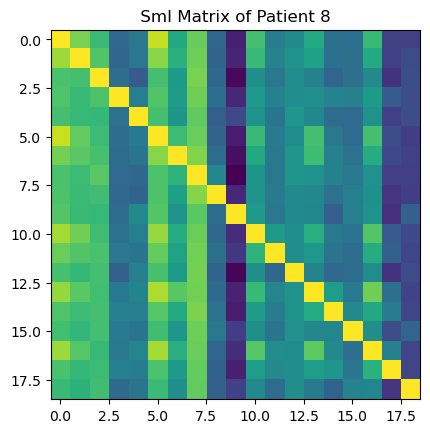

In [181]:
plt.figure()
plt.imshow(M_p8, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 8 ")
plt.show()

In [182]:
## Compute Smi in Patient 9
m = p9.shape[0]
M_p9 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p9[i]
            y1=p9[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p9[i,j]=smi
        
for i in range(m):
    M_p9[i,i]=1        
np.save("M_p9",M_p9)

Smi between << x : channel 0  , y : channel 1 >> is :0.9664647376744667
Smi between << x : channel 0  , y : channel 2 >> is :0.9524250079898857
Smi between << x : channel 0  , y : channel 3 >> is :0.9394829485555295
Smi between << x : channel 0  , y : channel 4 >> is :0.9628718131076311
Smi between << x : channel 0  , y : channel 5 >> is :0.9774802084212272
Smi between << x : channel 0  , y : channel 6 >> is :0.9531124062353126
Smi between << x : channel 0  , y : channel 7 >> is :0.9629501279909332
Smi between << x : channel 0  , y : channel 8 >> is :0.9136659711813028
Smi between << x : channel 0  , y : channel 9 >> is :0.9371612304528327
Smi between << x : channel 0  , y : channel 10 >> is :0.9553565330143028
Smi between << x : channel 0  , y : channel 11 >> is :0.928946525338978
Smi between << x : channel 0  , y : channel 12 >> is :0.9248268573254221
Smi between << x : channel 0  , y : channel 13 >> is :0.9519948820693295
Smi between << x : channel 0  , y : channel 14 >> is :0.95163

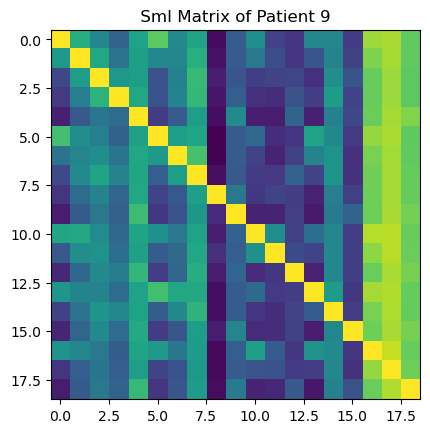

In [183]:
plt.figure()
plt.imshow(M_p9, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 9 ")
plt.show()

In [184]:
## Compute Smi in Patient 10
m = p10.shape[0]
M_p10 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p10[i]
            y1=p10[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p10[i,j]=smi
        
for i in range(m):
    M_p10[i,i]=1        
np.save("M_p10",M_p10)

Smi between << x : channel 0  , y : channel 1 >> is :0.9759344215949687
Smi between << x : channel 0  , y : channel 2 >> is :0.8772549489193883
Smi between << x : channel 0  , y : channel 3 >> is :0.8343133054097223
Smi between << x : channel 0  , y : channel 4 >> is :0.8044653349733927
Smi between << x : channel 0  , y : channel 5 >> is :0.9853141263191292
Smi between << x : channel 0  , y : channel 6 >> is :0.9640626922139591
Smi between << x : channel 0  , y : channel 7 >> is :0.8609233672895872
Smi between << x : channel 0  , y : channel 8 >> is :0.850893833038439
Smi between << x : channel 0  , y : channel 9 >> is :0.8121550105326817
Smi between << x : channel 0  , y : channel 10 >> is :0.9668411636362234
Smi between << x : channel 0  , y : channel 11 >> is :0.9225256970555161
Smi between << x : channel 0  , y : channel 12 >> is :0.8493859376798046
Smi between << x : channel 0  , y : channel 13 >> is :0.9576956542510447
Smi between << x : channel 0  , y : channel 14 >> is :0.81130

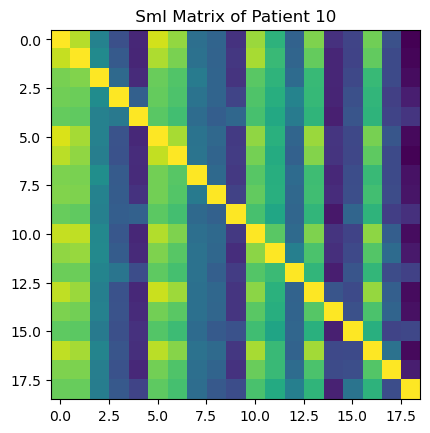

In [185]:
plt.figure()
plt.imshow(M_p10, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 10 ")
plt.show()

In [186]:
## Compute Smi in Patient 11
m = p11.shape[0]
M_p11 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p11[i]
            y1=p11[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p11[i,j]=smi
        
for i in range(m):
    M_p11[i,i]=1        
np.save("M_p11",M_p11)

Smi between << x : channel 0  , y : channel 1 >> is :0.9940501626970603
Smi between << x : channel 0  , y : channel 2 >> is :0.9942494622569679
Smi between << x : channel 0  , y : channel 3 >> is :0.9862586179213024
Smi between << x : channel 0  , y : channel 4 >> is :0.9009058223394516
Smi between << x : channel 0  , y : channel 5 >> is :0.9893447375540528
Smi between << x : channel 0  , y : channel 6 >> is :0.9971242126383884
Smi between << x : channel 0  , y : channel 7 >> is :0.9655509972559319
Smi between << x : channel 0  , y : channel 8 >> is :0.9694743760277439
Smi between << x : channel 0  , y : channel 9 >> is :0.9390969814452071
Smi between << x : channel 0  , y : channel 10 >> is :0.986560061568968
Smi between << x : channel 0  , y : channel 11 >> is :0.974080116647921
Smi between << x : channel 0  , y : channel 12 >> is :0.9399140835408025
Smi between << x : channel 0  , y : channel 13 >> is :0.9809329637780827
Smi between << x : channel 0  , y : channel 14 >> is :0.967459

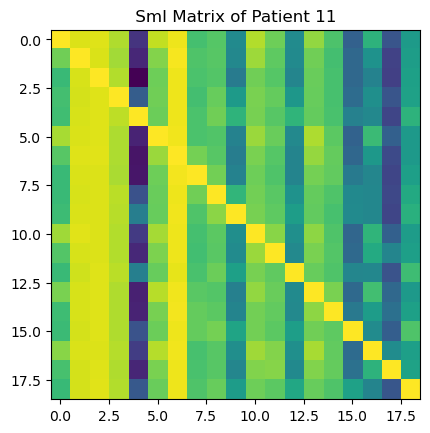

In [187]:
plt.figure()
plt.imshow(M_p11, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 11 ")
plt.show()

In [188]:
## Compute Smi in Patient 12
m = p12.shape[0]
M_p12 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p12[i]
            y1=p12[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p12[i,j]=smi
        
for i in range(m):
    M_p12[i,i]=1        
np.save("M_p12",M_p12)

Smi between << x : channel 0  , y : channel 1 >> is :0.9682644582125938
Smi between << x : channel 0  , y : channel 2 >> is :0.9488160780703041
Smi between << x : channel 0  , y : channel 3 >> is :0.9375612902816777
Smi between << x : channel 0  , y : channel 4 >> is :0.97289988129305
Smi between << x : channel 0  , y : channel 5 >> is :0.9974180587768575
Smi between << x : channel 0  , y : channel 6 >> is :0.9383212140050639
Smi between << x : channel 0  , y : channel 7 >> is :0.9707680486152469
Smi between << x : channel 0  , y : channel 8 >> is :0.9935759280009041
Smi between << x : channel 0  , y : channel 9 >> is :0.9691273173044171
Smi between << x : channel 0  , y : channel 10 >> is :0.9758612752406821
Smi between << x : channel 0  , y : channel 11 >> is :0.9476972704420658
Smi between << x : channel 0  , y : channel 12 >> is :0.9495872643062406
Smi between << x : channel 0  , y : channel 13 >> is :0.9679358235424247
Smi between << x : channel 0  , y : channel 14 >> is :0.968949

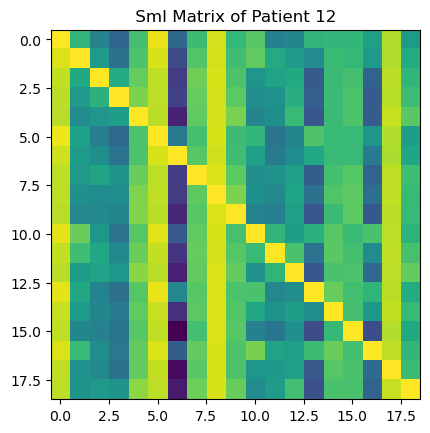

In [189]:
plt.figure()
plt.imshow(M_p12, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 12 ")
plt.show()

In [190]:
## Compute Smi in Patient 13
m = p13.shape[0]
M_p13 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p13[i]
            y1=p13[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p13[i,j]=smi
        
for i in range(m):
    M_p13[i,i]=1        
np.save("M_p13",M_p13)

Smi between << x : channel 0  , y : channel 1 >> is :0.9571532133641026
Smi between << x : channel 0  , y : channel 2 >> is :0.9341813302271692
Smi between << x : channel 0  , y : channel 3 >> is :0.9864213035328395
Smi between << x : channel 0  , y : channel 4 >> is :0.9528069768830222
Smi between << x : channel 0  , y : channel 5 >> is :0.9851036851351311
Smi between << x : channel 0  , y : channel 6 >> is :0.9555100386085216
Smi between << x : channel 0  , y : channel 7 >> is :0.9717762118611034
Smi between << x : channel 0  , y : channel 8 >> is :0.942354342783405
Smi between << x : channel 0  , y : channel 9 >> is :0.9304174102676918
Smi between << x : channel 0  , y : channel 10 >> is :0.9726561576064302
Smi between << x : channel 0  , y : channel 11 >> is :0.9487146472243561
Smi between << x : channel 0  , y : channel 12 >> is :0.9436759750677144
Smi between << x : channel 0  , y : channel 13 >> is :0.9564401386056355
Smi between << x : channel 0  , y : channel 14 >> is :0.95674

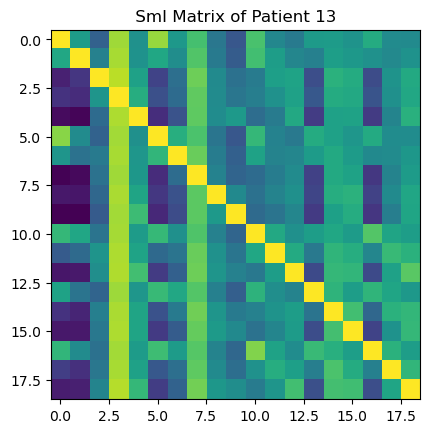

In [191]:
plt.figure()
plt.imshow(M_p13, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 13 ")
plt.show()

In [17]:
## Compute Smi in Patient 14
m = p14.shape[0]
M_p14 = np.ones((m,m))
for i in range (m):
    for j in range(m):
        if i != j : 
            x1=p14[i]
            y1=p14[j]
            x1=extract_features(x1, 200, 50)
            y1=extract_features(y1, 200, 50)
            smi = Smi (x1 , y1)
            print("Smi between << x : channel "+ str(i) ," , y : channel " + str(j)+ " >> is :" + str(smi))
        M_p14[i,j]=smi
        
for i in range(m):
    M_p14[i,i]=1        
np.save("M_p14",M_p14)

Smi between << x : channel 0  , y : channel 1 >> is :0.9988113387534334
Smi between << x : channel 0  , y : channel 2 >> is :0.998999878370608
Smi between << x : channel 0  , y : channel 3 >> is :0.9992483063803851
Smi between << x : channel 0  , y : channel 4 >> is :0.9987154914227863
Smi between << x : channel 0  , y : channel 5 >> is :0.999338772367593
Smi between << x : channel 0  , y : channel 6 >> is :0.9992678168381244
Smi between << x : channel 0  , y : channel 7 >> is :0.9988286808208436
Smi between << x : channel 0  , y : channel 8 >> is :0.9991454516358841
Smi between << x : channel 0  , y : channel 9 >> is :0.998744921381375
Smi between << x : channel 0  , y : channel 10 >> is :0.9994035245101397
Smi between << x : channel 0  , y : channel 11 >> is :0.9987297894165135
Smi between << x : channel 0  , y : channel 12 >> is :0.998555835065237
Smi between << x : channel 0  , y : channel 13 >> is :0.9994417502914894
Smi between << x : channel 0  , y : channel 14 >> is :0.99604756

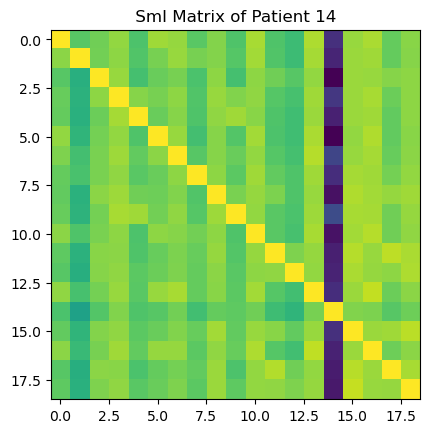

In [56]:

plt.figure()
plt.imshow(M_p14, interpolation='none')
plt.plot()
plt.title ( " SmI Matrix of Patient 14 ")
plt.show()


# Results and Connectivity Graph

In [279]:
import numpy as np
import networkx as nx

node_labels = {0: 'Fp1', 1: 'Fp2', 2: 'F7', 3: 'F3' , 4: 'Fz' , 5: 'F4' ,
              6: 'F8' , 7: 'T3' , 8: 'C3' , 9: 'Cz' , 10: 'C4' , 11: 'T4' , 12: 'T5' ,
              13: 'P3' , 14: 'Pz' , 15: 'P4' , 16: 'T6' , 17: 'O1' , 18: 'O2'}

M_p1=np.load("M_p1.npy")
M_p2=np.load("M_p2.npy")
M_p3=np.load("M_p3.npy")
M_p4=np.load("M_p4.npy")
M_p5=np.load("M_p5.npy")
M_p6=np.load("M_p6.npy")
M_p7=np.load("M_p7.npy")
M_p8=np.load("M_p8.npy")
M_p9=np.load("M_p9.npy")
M_p10=np.load("M_p10.npy")
M_p11=np.load("M_p11.npy")
M_p12=np.load("M_p12.npy")
M_p13=np.load("M_p13.npy")
M_p14=np.load("M_p14.npy")


M_c1=np.load("M_c1.npy")
M_c2=np.load("M_c2.npy")
M_c3=np.load("M_c3.npy")
M_c4=np.load("M_c4.npy")
M_c5=np.load("M_c5.npy")
M_c6=np.load("M_c6.npy")
M_c7=np.load("M_c7.npy")
M_c8=np.load("M_c8.npy")
M_c9=np.load("M_c9.npy")
M_c10=np.load("M_c10.npy")
M_c11=np.load("M_c11.npy")
M_c12=np.load("M_c12.npy")
M_c13=np.load("M_c13.npy")
M_c14=np.load("M_c14.npy")

axis = 0
norm ='l2'

# Patient

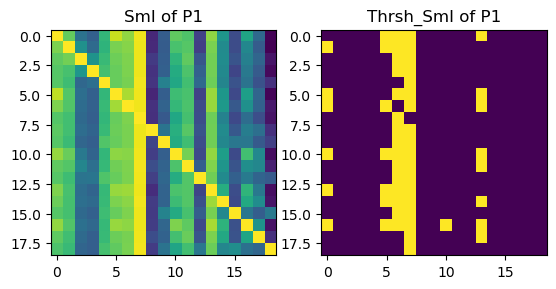

Number of Connections : 55


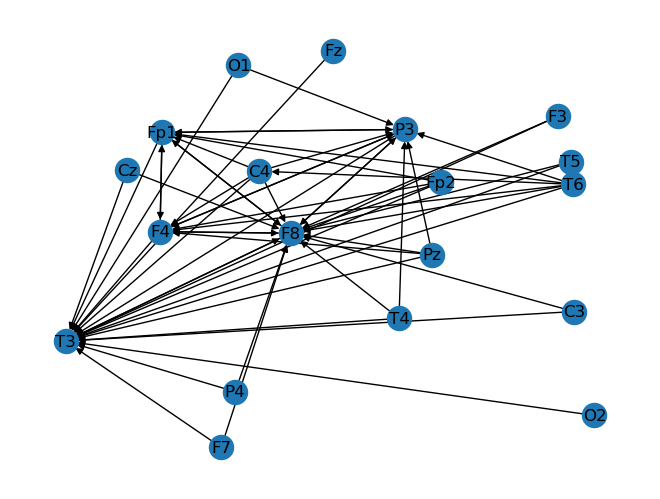

In [280]:
## Patient 1 :
M = M_p1
num = 1

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

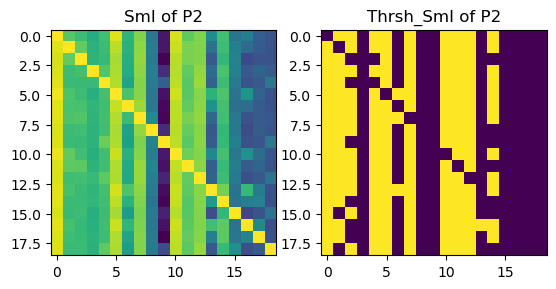

Number of Connections : 170


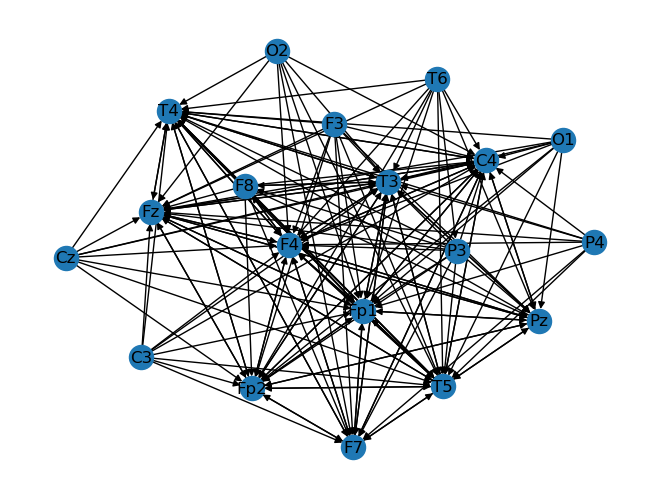

In [281]:
## Patient 2 :
M = M_p2
num = 2

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

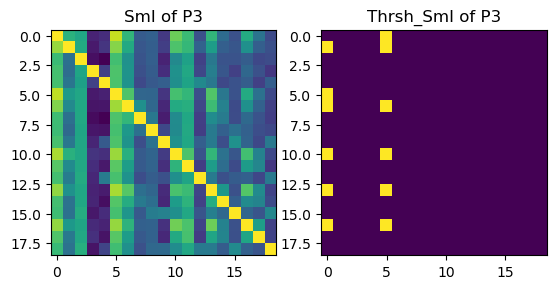

Number of Connections : 12


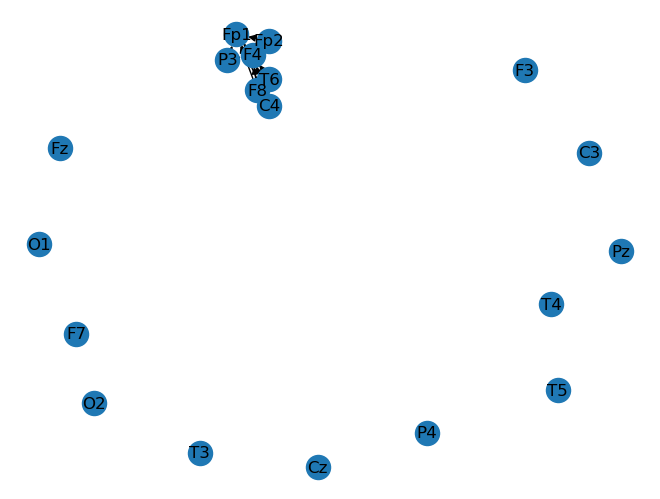

In [282]:
## Patient 3 :
M = M_p3
num = 3

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

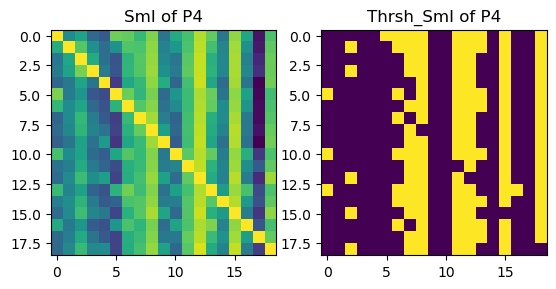

Number of Connections : 131


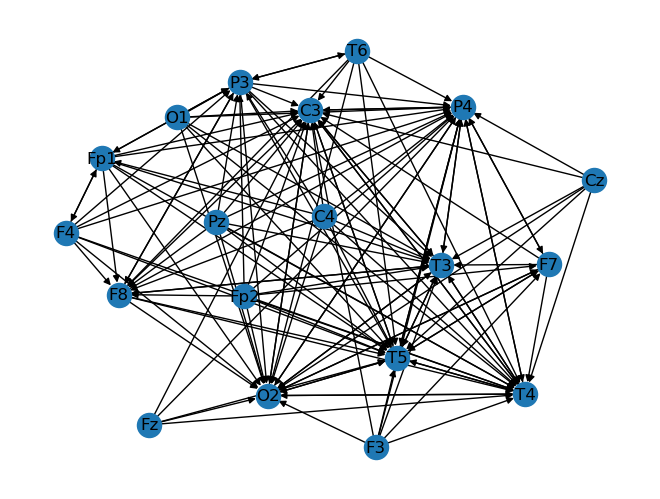

In [283]:
## Patient 4 :
M = M_p4
num = 4

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

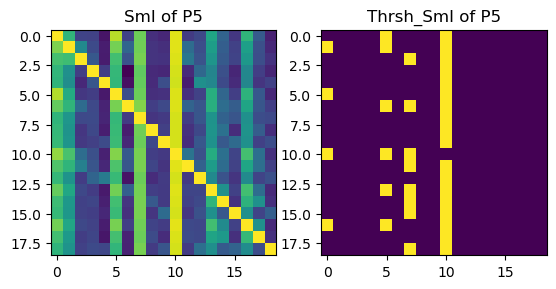

Number of Connections : 36


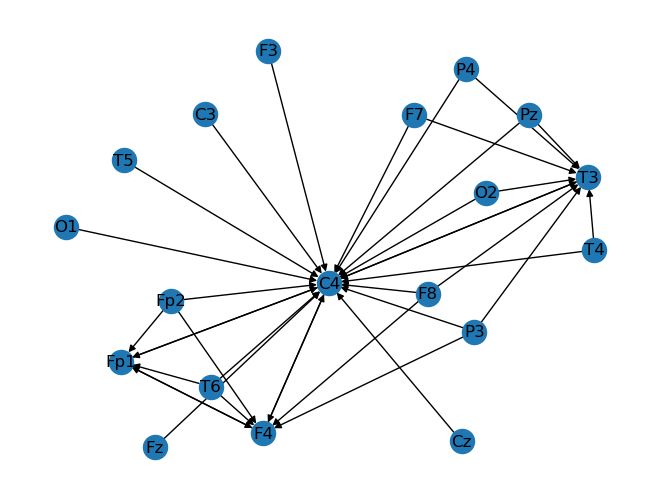

In [284]:
## Patient 2 :
M = M_p5
num = 5

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

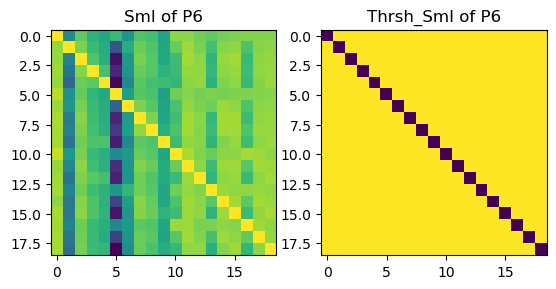

Number of Connections : 342


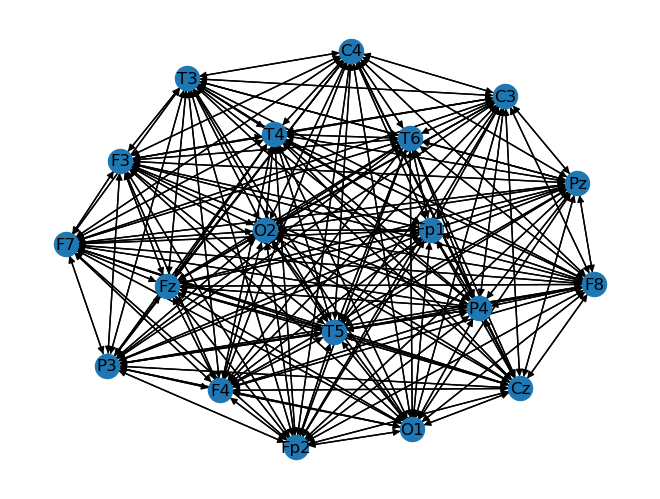

In [285]:
## Patient 6 :
M = M_p6
num = 6

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

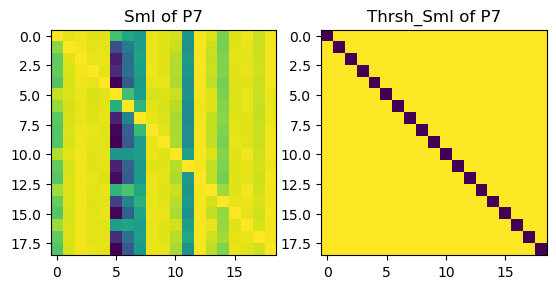

Number of Connections : 342


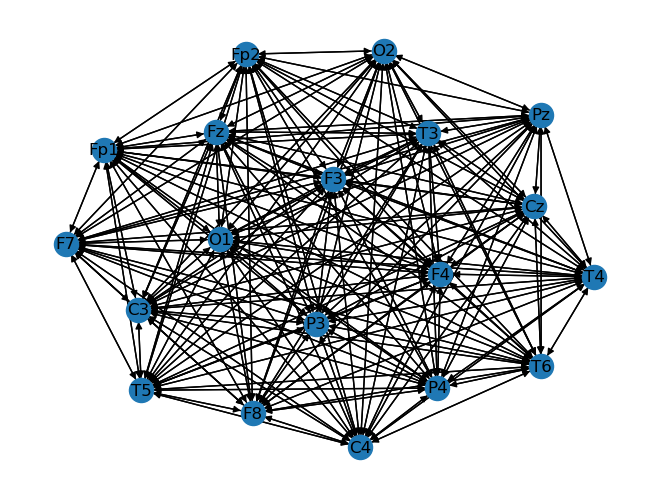

In [286]:
## Patient 7 :
M = M_p7
num = 7

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

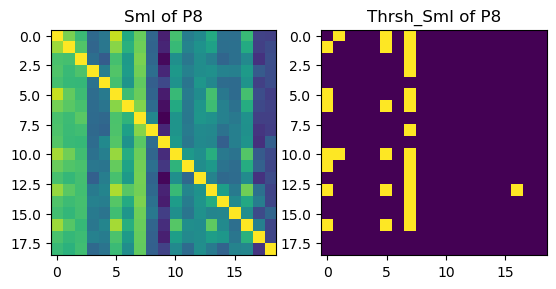

Number of Connections : 30


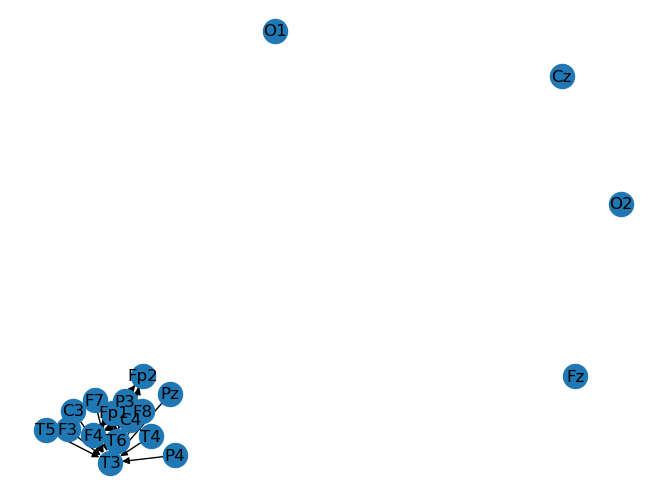

In [287]:
## Patient 8 :
M = M_p8
num = 8

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

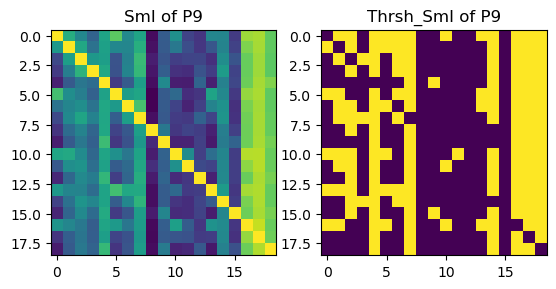

Number of Connections : 159


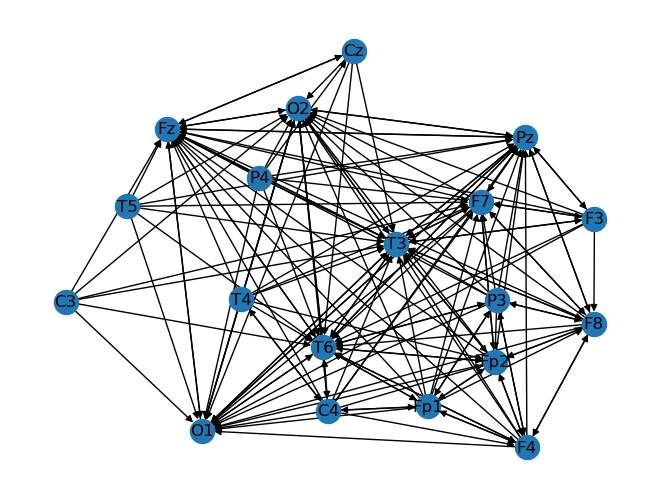

In [288]:
## Patient 9 :
M = M_p9
num = 9

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

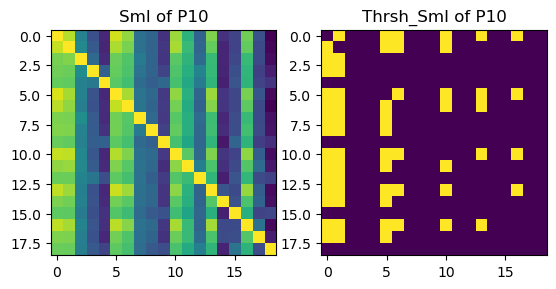

Number of Connections : 61


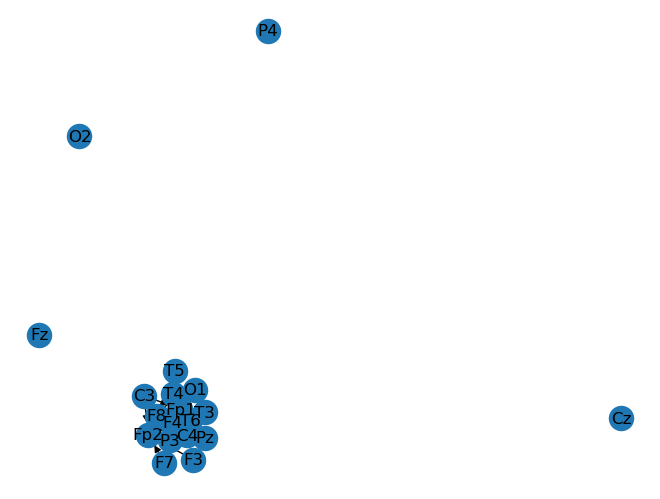

In [289]:
## Patient 10 :
M = M_p10
num = 10

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

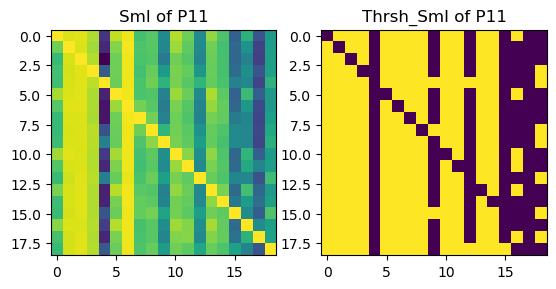

Number of Connections : 235


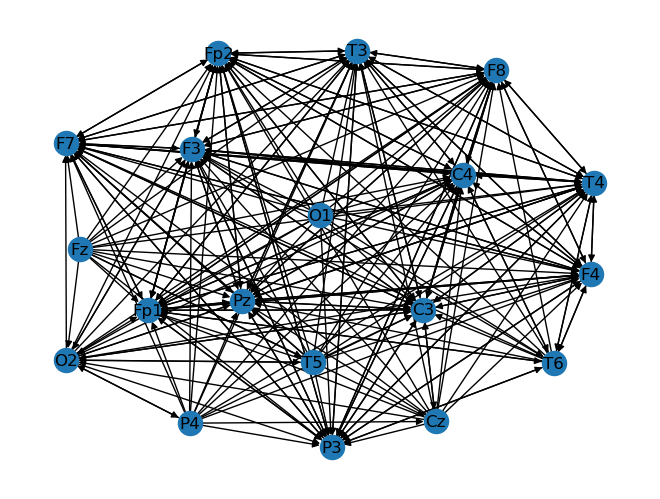

In [290]:
## Patient 11 :
M = M_p11
num = 11

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

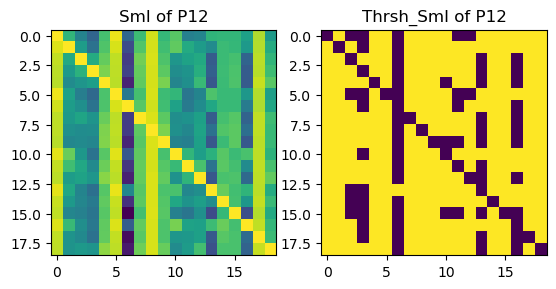

Number of Connections : 278


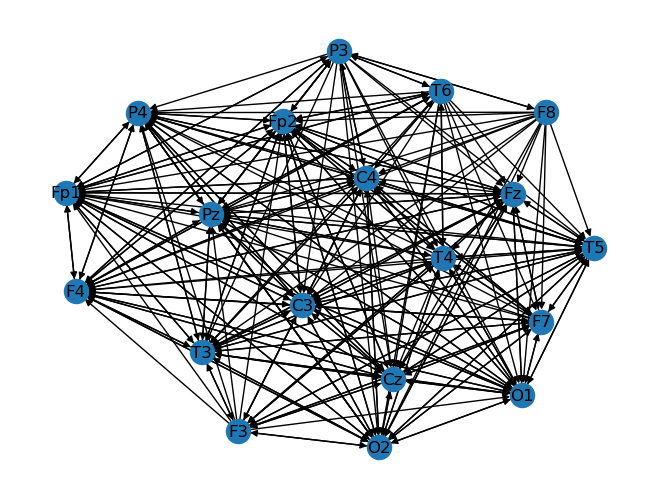

In [291]:
## Patient 12 :
M = M_p12
num = 12

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

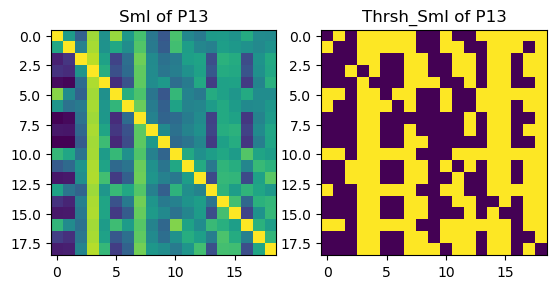

Number of Connections : 199


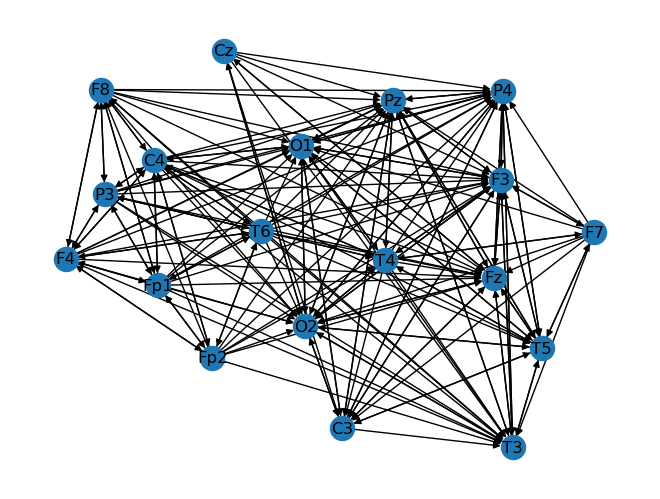

In [292]:
## Patient 13 :
M = M_p13
num = 13

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

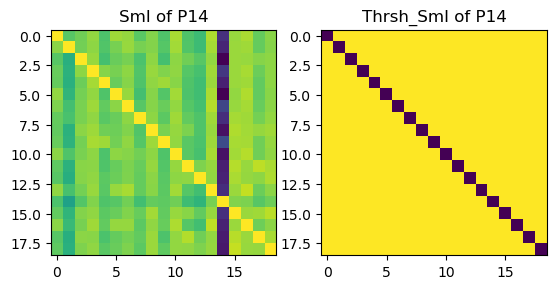

Number of Connections : 342


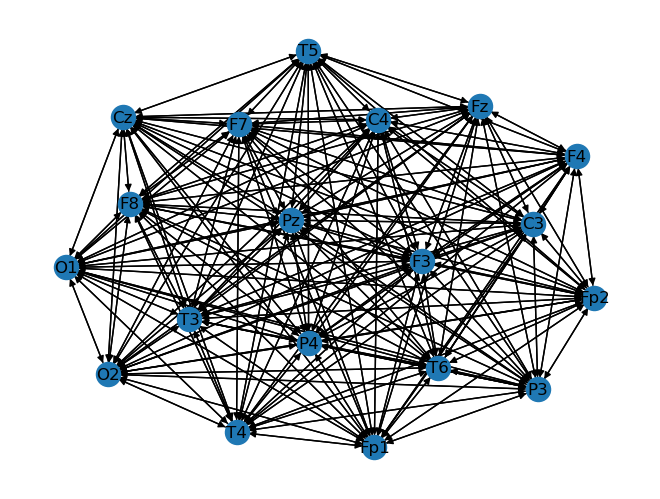

In [293]:
## Patient 14 :
M = M_p14
num = 14

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of P" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of P" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

# Control

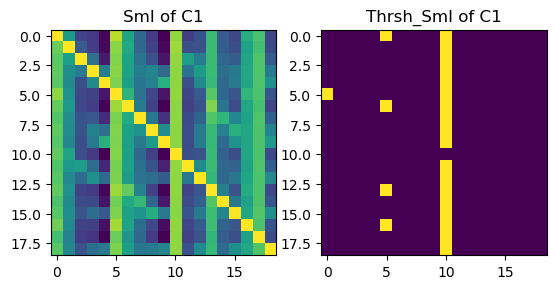

Number of Connections : 23


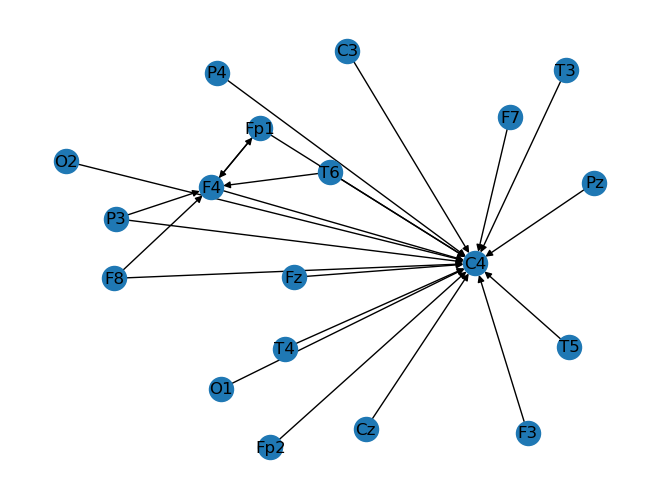

In [294]:
## Control 1 :
M = M_c1
num = 1

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

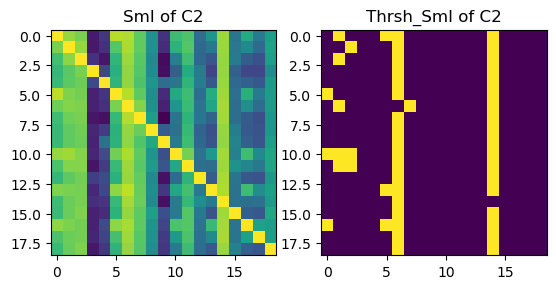

Number of Connections : 51


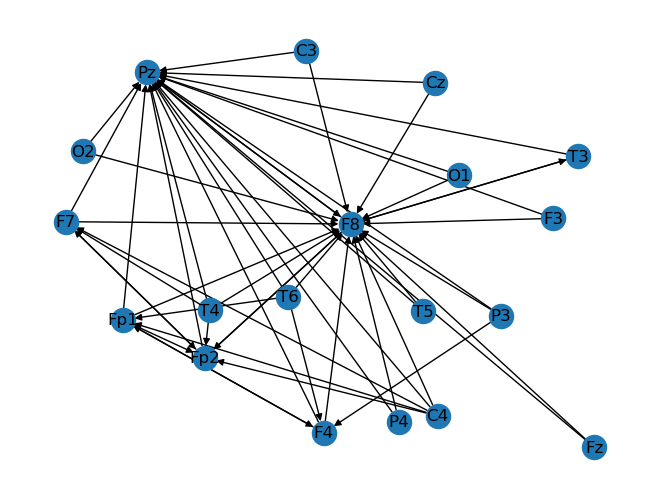

In [295]:
## Control 2 :
M = M_c2
num = 2

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

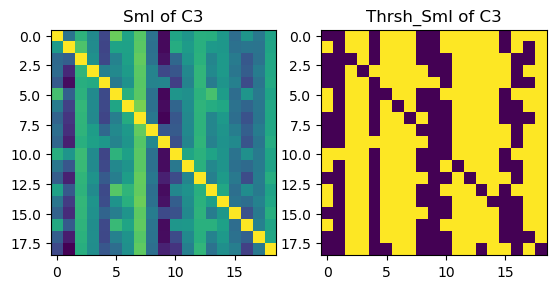

Number of Connections : 228


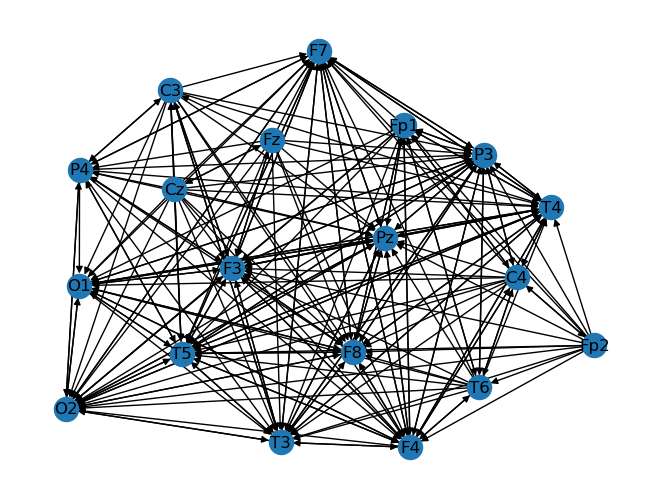

In [296]:
## Control 3 :
M = M_c3
num = 3

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

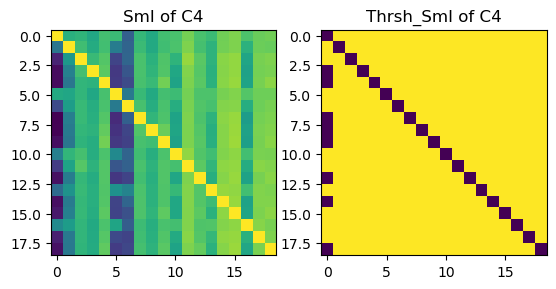

Number of Connections : 334


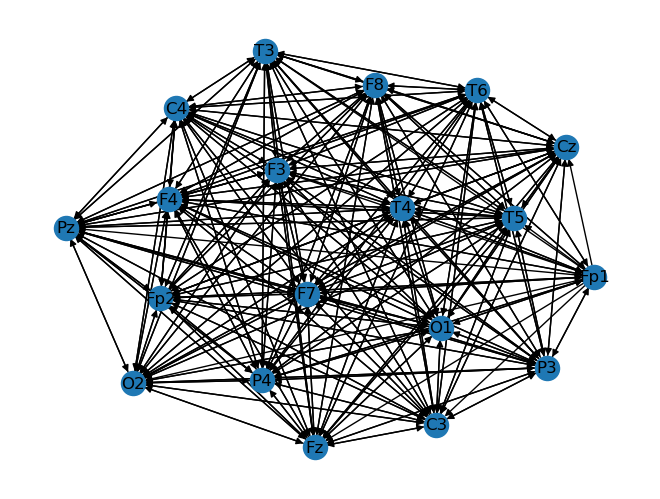

In [297]:
## Control 4 :
M = M_c4
num = 4

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

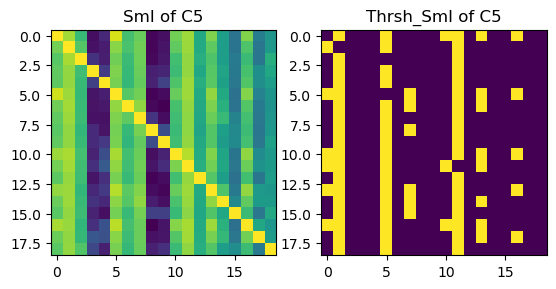

Number of Connections : 81


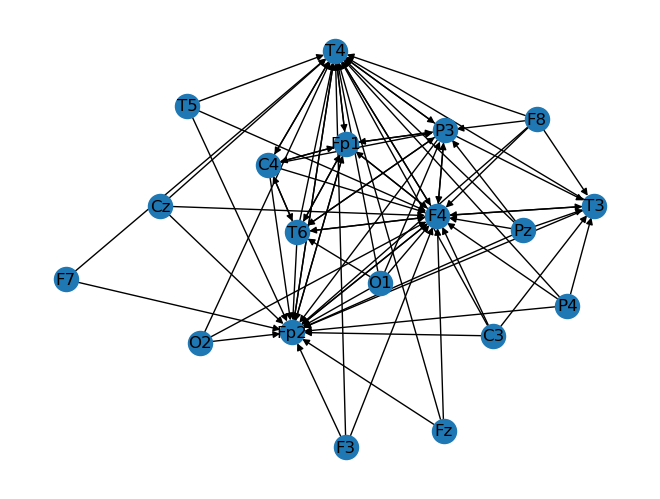

In [298]:
## Control 5 :
M = M_c5
num = 5

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

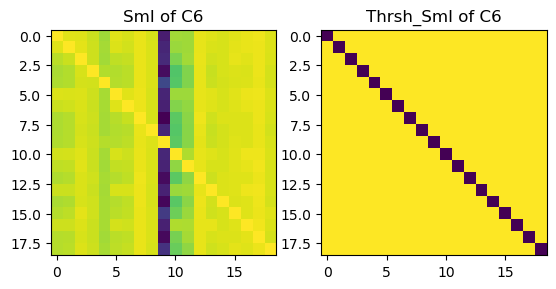

Number of Connections : 342


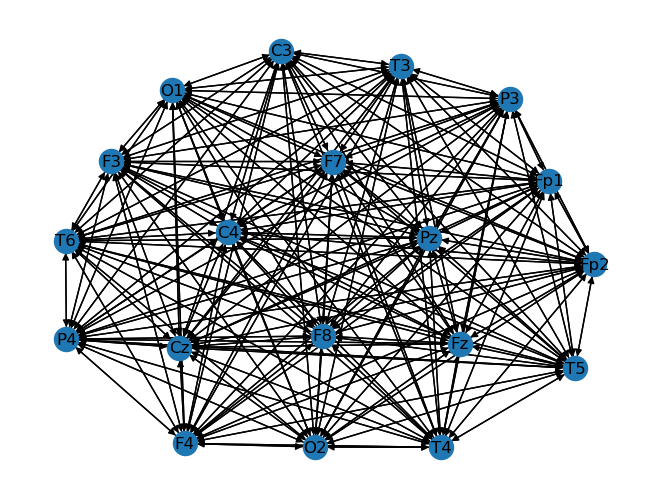

In [299]:
## Control 6 :
M = M_c6
num = 6

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

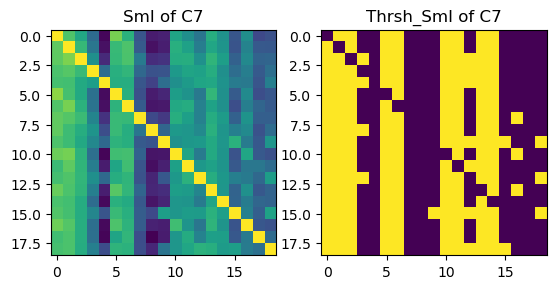

Number of Connections : 182


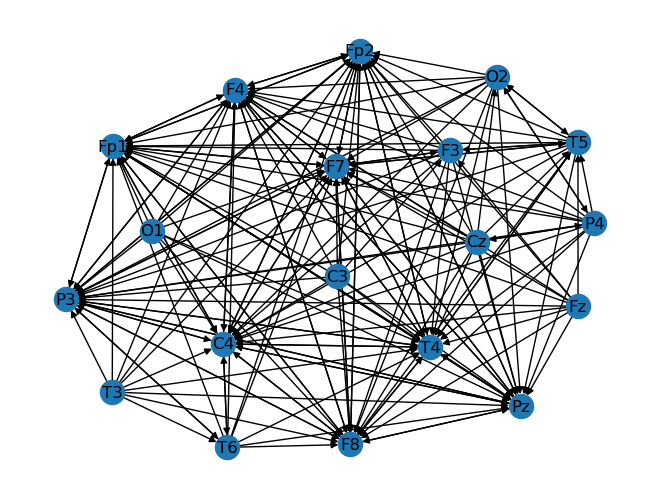

In [300]:
## Control 7 :
M = M_c7
num = 7

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

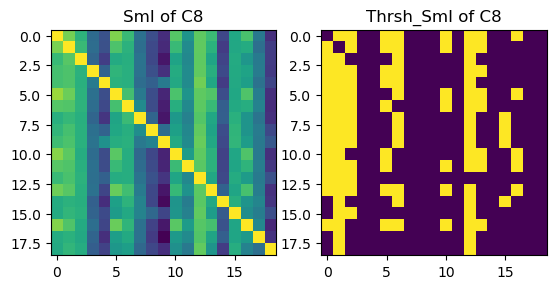

Number of Connections : 108


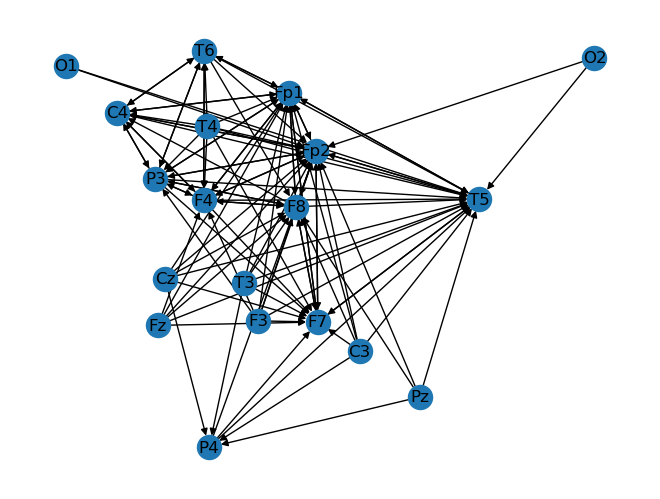

In [301]:
## Control 8 :
M = M_c8
num = 8

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

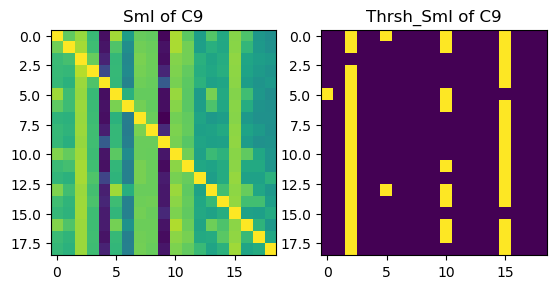

Number of Connections : 47


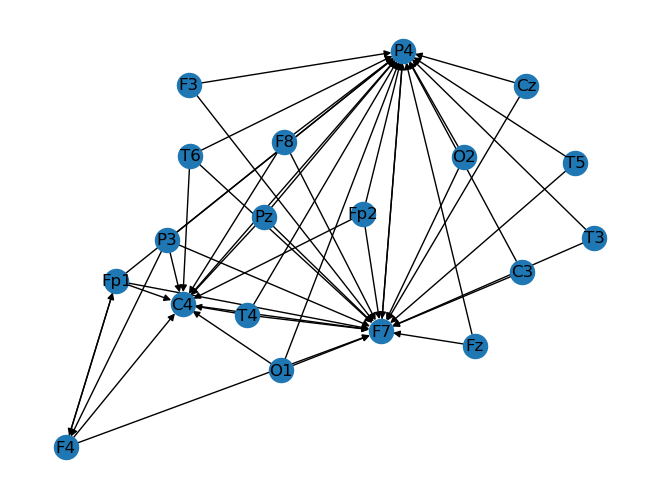

In [302]:
## Control 9 :
M = M_c9
num = 9

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

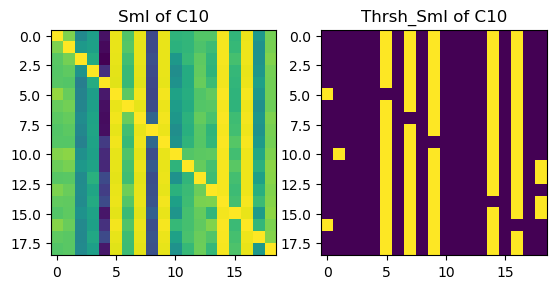

Number of Connections : 97


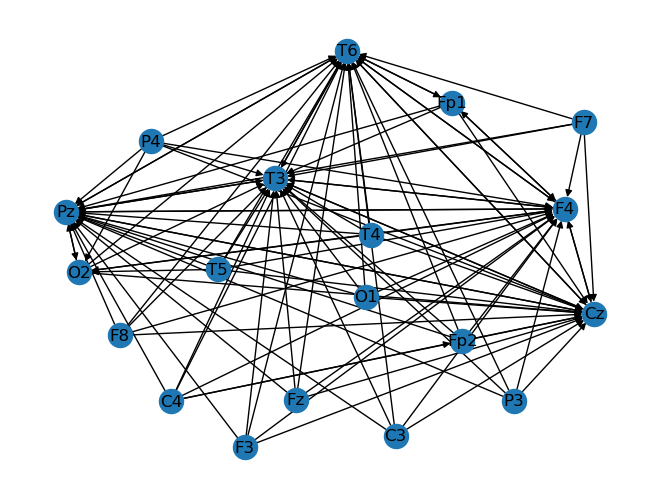

In [303]:
## Control 10 :
M = M_c10
num = 10

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

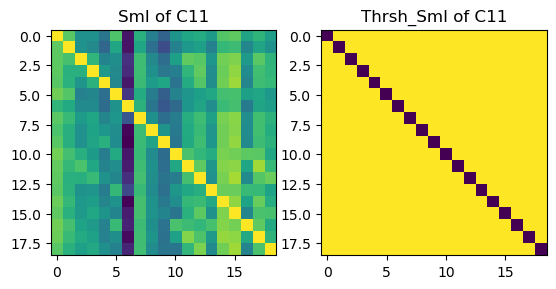

Number of Connections : 342


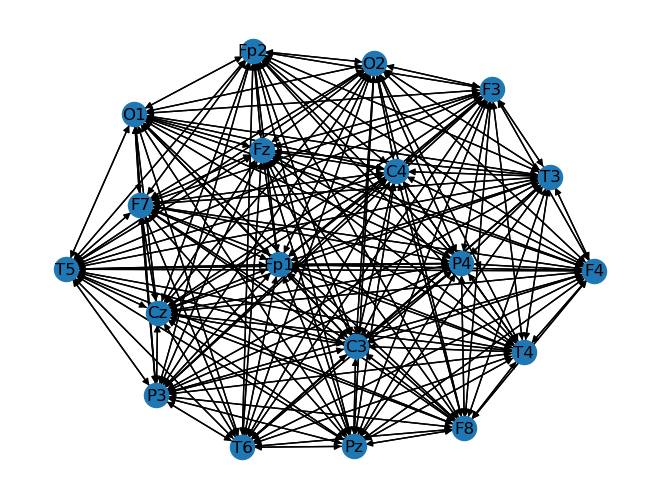

In [304]:
## Control 11 :
M = M_c11
num = 11

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

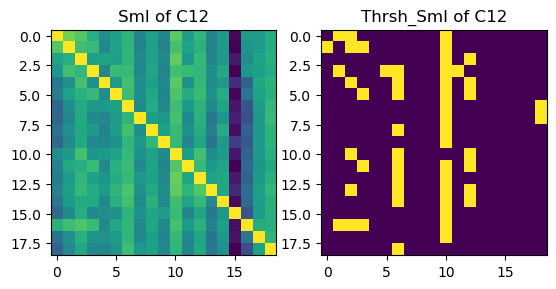

Number of Connections : 52


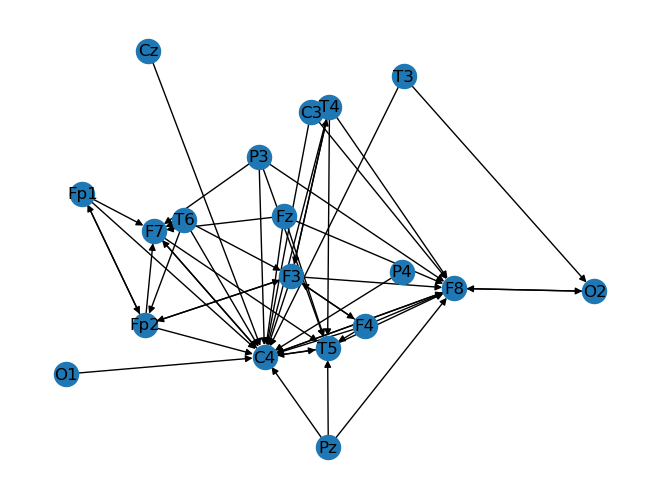

In [305]:
## Control 12 :
M = M_c12
num = 12

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

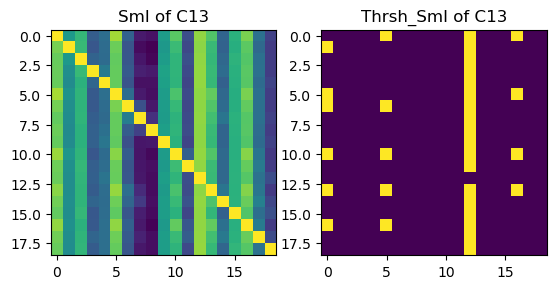

Number of Connections : 33


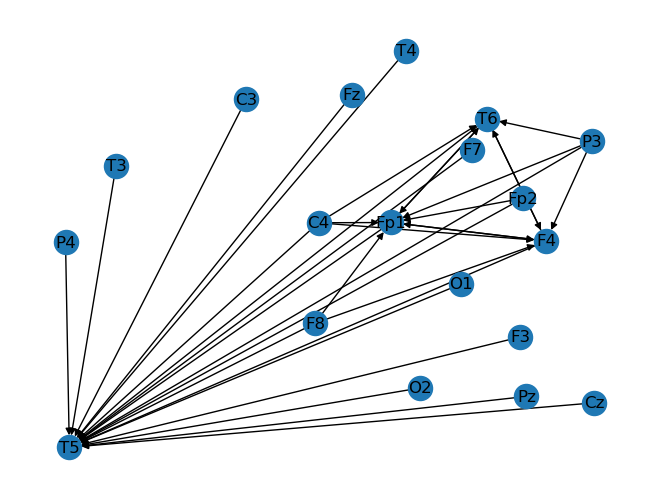

In [306]:
## Control 13 :
M = M_c13
num = 13

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

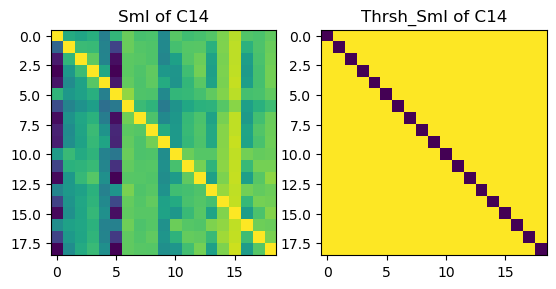

Number of Connections : 342


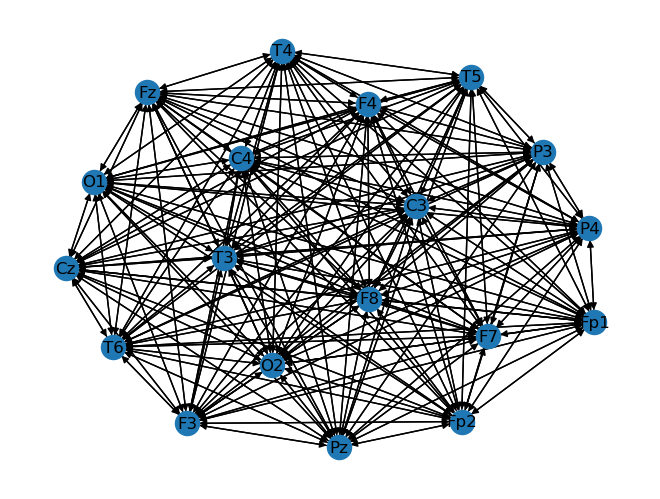

In [307]:
## Control 14 :
M = M_c14
num = 14

plt.figure()

plt.subplot(1, 2, 1)

plt.imshow(M , interpolation='none')
plt.plot()
plt.title ( "SmI of C" + str(num))

m = 0.95

M_G = M - np.eye(19)
M_G = M_G > m

plt.subplot(1, 2, 2)
plt.imshow(M_G, interpolation='none')
plt.plot()
plt.title ( "Thrsh_SmI of C" +str(num) )
plt.show()

G = nx.Graph()
G = nx.DiGraph(M_G)

G = nx.relabel_nodes(G, node_labels)

# plot the graph
nx.draw(G, with_labels=True)

print("Number of Connections : " + str(np.count_nonzero(M_G)))

# what to do next :
    1) check if smi holds in granger and entropy framework
    2) plot the smi result in mne scalp and check with the results from other papers
    3) plot a graph based on the smi result and train for schizpphernia prediction
    4) compute with other techniques of feature extraction
    